## Sampling for the Match Filter

In [2]:
#Libraries to import
using SerialPorts
using PyPlot
using FFTW 

## Sampling the Echo 

In [19]:
list_serialports() # show available ports

y = []
b = ""
i = 0

ser = SerialPort("COM3:", 9600) 

r = readavailable(ser)

# Start a conversion
write(ser, "c")

while bytesavailable(ser) < 1
    continue 
end
sleep(0.05)
r = readavailable(ser)

# Get the values
write(ser, "p") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end 

close(ser)

y=split(b, ("\r\n"))

println(length(y))   


29979


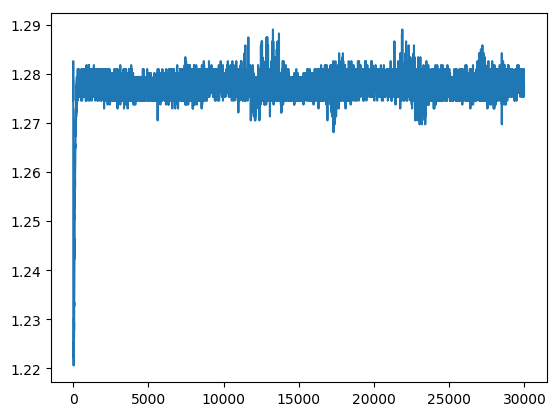

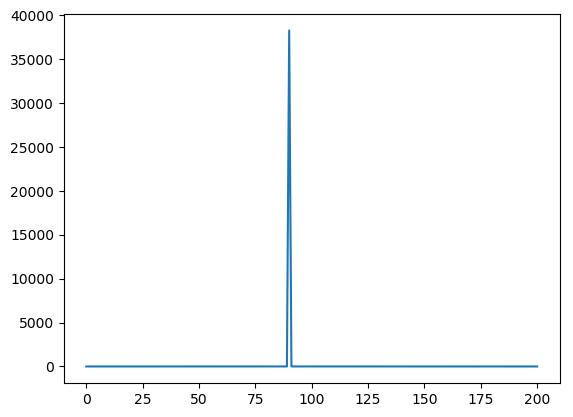

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000000E37AC8>

In [20]:
rc = []
i=1

while (i<length(y)-1)
    if length(y[i])>5
        push!(rc,parse(Int,(y[i][1:4])))
        push!(rc,parse(Int,(y[i][5:8])))
    else    
        push!(rc,parse(Int,(y[i])))        
    end 
    i+=1
end

receive = (3.3/4096).*rc
# print(match)
figure()
plot(receive)
RECEIVE = abs.(fftshift(fft(receive)));

figure()
plot(RECEIVE[14900:15100])

### Values for Processing

In [21]:
c = 343;          # Speed of sound in air in m/s
fs = 500000;       # This is the sample rate of the sonar.
dt = 1/fs;        # This is the sample spacing
r_max = 10;        # Maximum range in metres to which to simulate.
t_max = 2*r_max/c;

t = collect(0:dt:t_max);

# t = t[0:length(y)]
r = c*t/2;        

f0 = 40000;       # Centre frequency is 10 kHz
B = 2000;         # Chirp bandwidth
T = 6E-3;         # Chirp pulse length
K = B/T;          # Chirp rate

td = 0.6*T;

## Matched Filtering

In [22]:
N = length(t);
Δf = 1/(N*dt)  
# spacing in frequency domain

#create array of freq values stored in f_axis. First element maps to 0Hz
f_axis = (0:N-1)*Δf; 
print(N)

29155

In [7]:
chirp_pulse = [2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 0, 15, 61, 137, 241, 372, 529, 708, 907, 1123, 1354, 1594, 1842, 2092, 2342, 2587, 2825, 3050, 3261, 3453, 3624, 3772, 3894, 3988, 4053, 4088, 4092, 4066, 4009, 3923, 3809, 3668, 3503, 3316, 3111, 2889, 2654, 2411, 2162, 1911, 1663, 1420, 1186, 966, 761, 576, 413, 275, 163, 79, 25, 1, 8, 45, 113, 209, 333, 483, 656, 851, 1063, 1289, 1527, 1773, 2023, 2274, 2521, 2761, 2990, 3205, 3403, 3580, 3734, 3863, 3965, 4038, 4081, 4094, 4076, 4027, 3949, 3842, 3708, 3550, 3369, 3168, 2950, 2718, 2477, 2229, 1978, 1729, 1484, 1248, 1023, 814, 624, 454, 309, 190, 99, 36, 5, 3, 33, 92, 181, 298, 441, 609, 798, 1005, 1228, 1464, 1708, 1958, 2208, 2457, 2699, 2931, 3150, 3353, 3536, 3696, 3832, 3941, 4022, 4073, 4094, 4083, 4043, 3972, 3872, 3746, 3593, 3417, 3221, 3007, 2779, 2540, 2293, 2043, 1792, 1546, 1307, 1079, 866, 670, 495, 344, 218, 119, 49, 10, 1, 22, 74, 156, 266, 403, 564, 748, 951, 1171, 1404, 1646, 1895, 2146, 2395, 2639, 2874, 3097, 3304, 3492, 3659, 3801, 3917, 4005, 4063, 4091, 4089, 4056, 3992, 3900, 3779, 3633, 3463, 3271, 3062, 2836, 2599, 2354, 2104, 1854, 1606, 1365, 1134, 917, 716, 536, 378, 246, 140, 64, 17, 0, 14, 59, 134, 237, 367, 523, 702, 901, 1117, 1347, 1587, 1835, 2085, 2335, 2581, 2819, 3045, 3256, 3449, 3621, 3769, 3892, 3986, 4052, 4087, 4092, 4066, 4010, 3924, 3810, 3670, 3505, 3318, 3112, 2891, 2656, 2412, 2163, 1912, 1663, 1420, 1187, 966, 761, 576, 413, 274, 162, 79, 25, 1, 8, 46, 114, 211, 335, 485, 659, 853, 1066, 1293, 1531, 1778, 2028, 2278, 2526, 2766, 2995, 3210, 3407, 3584, 3738, 3866, 3967, 4040, 4082, 4094, 4075, 4025, 3946, 3838, 3704, 3544, 3362, 3160, 2941, 2709, 2467, 2219, 1968, 1719, 1474, 1238, 1014, 805, 615, 447, 303, 185, 95, 34, 4, 4, 35, 96, 187, 305, 450, 619, 809, 1018, 1242, 1479, 1723, 1973, 2224, 2472, 2714, 2946, 3164, 3366, 3548, 3707, 3841, 3948, 4027, 4076, 4094, 4081, 4038, 3965, 3864, 3735, 3580, 3402, 3205, 2989, 2760, 2519, 2272, 2021, 1771, 1525, 1287, 1060, 848, 654, 481, 331, 207, 111, 44, 8, 1, 26, 81, 166, 278, 418, 582, 768, 973, 1195, 1429, 1672, 1921, 2173, 2422, 2665, 2899, 3121, 3326, 3512, 3676, 3816, 3928, 4013, 4068, 4093, 4086, 4050, 3983, 3887, 3763, 3613, 3440, 3246, 3034, 2807, 2569, 2322, 2072, 1821, 1574, 1333, 1104, 889, 691, 513, 359, 230, 128, 55, 12, 0, 19, 68, 147, 254, 388, 548, 730, 932, 1150, 1382, 1624, 1873, 2124, 2373, 2618, 2855, 3079, 3288, 3478, 3646, 3791, 3909, 3999, 4060, 4090, 4090, 4059, 3998, 3907, 3789, 3644, 3475, 3285, 3076, 2851, 2615, 2369, 2119, 1868, 1620, 1378, 1146, 928, 727, 545, 386, 252, 145, 67, 18, 0, 13, 56, 130, 232, 362, 517, 695, 893, 1109, 1338, 1579, 1826, 2077, 2328, 2574, 2812, 3039, 3251, 3445, 3617, 3766, 3889, 3985, 4051, 4087, 4092, 4067, 4011, 3926, 3812, 3672, 3507, 3320, 3114, 2892, 2658, 2414, 2164, 1913, 1664, 1421, 1187, 966, 761, 575, 412, 274, 162, 78, 24, 1, 8, 47, 115, 212, 337, 488, 662, 857, 1070, 1298, 1537, 1783, 2034, 2285, 2532, 2772, 3001, 3216, 3413, 3589, 3742, 3870, 3970, 4042, 4083, 4094, 4073, 4023, 3942, 3833, 3697, 3536, 3353, 3150, 2931, 2698, 2455, 2206, 1955, 1705, 1461, 1225, 1001, 794, 605, 438, 295, 178, 90, 31, 3, 5, 38, 102, 194, 315, 462, 632, 824, 1034, 1260, 1497, 1743, 1993, 2244, 2493, 2734, 2965, 3182, 3382, 3562, 3720, 3852, 3956, 4032, 4079, 4094, 4079, 4033, 3957, 3852, 3720, 3563, 3383, 3183, 2966, 2735, 2494, 2245, 1994, 1744, 1498, 1261, 1035, 825, 633, 462, 315, 195, 102, 38, 5, 3, 31, 90, 178, 295, 438, 605, 794, 1001, 1225, 1461, 1706, 1955, 2207, 2456, 2698, 2931, 3151, 3354, 3537, 3698, 3834, 3943, 4023, 4074, 4094, 4083, 4041, 3970, 3869, 3741, 3588, 3411, 3214, 2999, 2769, 2529, 2282, 2031, 1780, 1533, 1294, 1067, 854, 659, 485, 335, 210, 113, 46, 8, 1, 25, 80, 164, 277, 416, 580, 766, 971, 1193, 1427, 1671, 1920, 2172, 2421, 2665, 2900, 3121, 3327, 3513, 3677, 3817, 3929, 4014, 4068, 4093, 4086, 4049, 3981, 3885, 3760, 3610, 3436, 3241, 3028, 2801, 2562, 2315, 2064, 1813, 1566, 1326, 1096, 881, 684, 507, 353, 225, 124, 53, 11, 0, 20, 71, 151, 260, 396, 557, 741, 944, 1163, 1396, 1639, 1888, 2140, 2390, 2634, 2870, 3094, 3302, 3491, 3658, 3800, 3917, 4005, 4063, 4091, 4089, 4055, 3991, 3898, 3777, 3630, 3459, 3266, 3056, 2830, 2592, 2346, 2095, 1844, 1596, 1354, 1123, 906, 707, 527, 370, 239, 135, 60, 15, 0, 16, 63, 140, 246, 379, 537, 718, 919, 1137, 1368, 1610, 1859, 2110, 2361, 2606, 2844, 3069, 3279, 3470, 3639, 3785, 3905, 3996, 4058, 4090, 4091, 4060, 4000, 3910, 3792, 3648, 3479, 3289, 3080, 2856, 2619, 2374, 2123, 1872, 1623, 1381, 1148, 930, 728, 546, 386, 252, 145, 67, 18, 0, 13, 57, 131, 233, 363, 519, 697, 896, 1113, 1343, 1584, 1832, 2084, 2334, 2581, 2819, 3046, 3257, 3451, 3623, 3771, 3894, 3988, 4053, 4088, 4092, 4065, 4008, 3921, 3805, 3664, 3497, 3309, 3102, 2879, 2643, 2399, 2149, 1897, 1648, 1404, 1171, 951, 747, 563, 401, 264, 154, 73, 21, 0, 10, 51, 122, 222, 350, 503, 679, 876, 1091, 1321, 1561, 1808, 2060, 2311, 2558, 2797, 3025, 3238, 3433, 3608, 3758, 3883, 3980, 4048, 4086, 4093, 4069, 4014, 3930, 3817, 3678, 3513, 3327, 3121, 2900, 2665, 2421, 2171, 1919, 1670, 1426, 1191, 969, 764, 578, 414, 275, 163, 79, 25, 1, 8, 47, 115, 212, 338, 489, 663, 859, 1073, 1301, 1540, 1788, 2039, 2290, 2537, 2778, 3007, 3221, 3418, 3594, 3747, 3874, 3974, 4044, 4084, 4093, 4072, 4020, 3938, 3827, 3690, 3527, 3343, 3138, 2918, 2684, 2440, 2191, 1939, 1689, 1444, 1209, 986, 779, 592, 426, 285, 170, 84, 28, 2, 7, 43, 109, 204, 327, 477, 650, 844, 1056, 1284, 1523, 1769, 2020, 2272, 2520, 2761, 2991, 3206, 3405, 3583, 3737, 3866, 3967, 4040, 4082, 4094, 4074, 4024, 3944, 3836, 3700, 3539, 3356, 3153, 2933, 2700, 2457, 2208, 1956, 1706, 1460, 1224, 1000, 792, 603, 436, 293, 177, 89, 30, 3, 6, 39, 104, 197, 319, 467, 638, 831, 1043, 1269, 1507, 1754, 2005, 2256, 2505, 2746, 2977, 3194, 3393, 3572, 3728, 3859, 3962, 4036, 4081, 4094, 4076, 4028, 3950, 3843, 3708, 3549, 3367, 3165, 2946, 2713, 2471, 2222, 1970, 1719, 1474, 1237, 1012, 803, 613, 445, 300, 182, 93, 33, 3, 5, 37, 100, 192, 312, 458, 629, 821, 1031, 1257, 1495, 1741, 1992, 2244, 2492, 2734, 2966, 3184, 3384, 3564, 3721, 3853, 3958, 4034, 4079, 4094, 4078, 4031, 3954, 3848, 3715, 3557, 3376, 3175, 2956, 2724, 2482, 2233, 1981, 1730, 1485, 1247, 1022, 812, 621, 451, 306, 187, 96, 35, 4, 4, 35, 96, 187, 306, 452, 621, 813, 1023, 1248, 1485, 1731, 1982, 2234, 2483, 2725, 2957, 3176, 3377, 3558, 3716, 3849, 3955, 4031, 4078, 4094, 4079, 4033, 3957, 3853, 3720, 3563, 3383, 3182, 2964, 2732, 2490, 2241, 1990, 1739, 1493, 1255, 1029, 819, 627, 456, 310, 190, 98, 36, 4, 3, 33, 94, 184, 302, 447, 616, 807, 1016, 1241, 1478, 1724, 1975, 2227, 2476, 2719, 2951, 3170, 3372, 3553, 3712, 3846, 3952, 4030, 4077, 4094, 4080, 4035, 3960, 3855, 3724, 3567, 3387, 3187, 2969, 2738, 2496, 2247, 1995, 1744, 1498, 1260, 1034, 823, 631, 460, 313, 193, 100, 37, 5, 3, 33, 93, 182, 300, 444, 613, 803, 1012, 1237, 1474, 1720, 1971, 2223, 2472, 2715, 2947, 3166, 3368, 3551, 3710, 3844, 3951, 4029, 4077, 4094, 4080, 4036, 3961, 3857, 3726, 3569, 3390, 3190, 2972, 2741, 2499, 2250, 1998, 1747, 1501, 1262, 1036, 825, 633, 461, 314, 194, 101, 38, 5, 3, 32, 92, 181, 299, 443, 611, 802, 1011, 1235, 1473, 1718, 1969, 2221, 2470, 2713, 2946, 3165, 3368, 3550, 3709, 3843, 3950, 4029, 4077, 4094, 4080, 4036, 3961, 3857, 3726, 3570, 3390, 3190, 2973, 2741, 2499, 2250, 1999, 1747, 1501, 1262, 1036, 825, 632, 461, 314, 193, 101, 38, 5, 3, 32, 92, 182, 299, 444, 612, 802, 1012, 1236, 1474, 1720, 1970, 2222, 2472, 2715, 2947, 3167, 3369, 3551, 3710, 3844, 3951, 4029, 4077, 4094, 4080, 4035, 3960, 3856, 3725, 3568, 3388, 3188, 2970, 2739, 2497, 2248, 1996, 1745, 1498, 1260, 1034, 823, 630, 459, 313, 192, 100, 37, 5, 3, 33, 93, 183, 301, 446, 615, 805, 1015, 1240, 1477, 1723, 1974, 2226, 2476, 2719, 2951, 3170, 3372, 3554, 3713, 3846, 3953, 4030, 4077, 4094, 4079, 4034, 3959, 3854, 3722, 3565, 3384, 3184, 2966, 2734, 2492, 2242, 1990, 1739, 1493, 1255, 1029, 818, 626, 456, 309, 190, 98, 36, 4, 4, 34, 95, 186, 304, 450, 619, 811, 1021, 1246, 1484, 1730, 1981, 2233, 2483, 2725, 2958, 3176, 3377, 3559, 3717, 3850, 3955, 4032, 4078, 4094, 4079, 4032, 3956, 3850, 3718, 3559, 3378, 3177, 2959, 2726, 2484, 2234, 1982, 1731, 1485, 1247, 1021, 811, 620, 450, 305, 186, 95, 34, 4, 4, 36, 98, 189, 309, 456, 626, 818, 1029, 1255, 1493, 1740, 1991, 2243, 2492, 2734, 2966, 3184, 3385, 3565, 3723, 3855, 3959, 4034, 4080, 4094, 4077, 4030, 3952, 3845, 3711, 3552, 3370, 3168, 2949, 2716, 2473, 2223, 1971, 1720, 1474, 1237, 1012, 802, 612, 443, 299, 181, 92, 32, 3, 5, 38, 101, 194, 316, 463, 635, 828, 1039, 1266, 1505, 1752, 2003, 2255, 2504, 2746, 2978, 3195, 3395, 3574, 3730, 3861, 3964, 4037, 4081, 4094, 4076, 4026, 3947, 3839, 3704, 3543, 3360, 3157, 2937, 2703, 2460, 2210, 1957, 1707, 1461, 1224, 1000, 791, 602, 434, 292, 175, 88, 30, 2, 6, 41, 106, 201, 324, 473, 645, 840, 1052, 1280, 1519, 1767, 2018, 2270, 2519, 2761, 2991, 3207, 3406, 3584, 3739, 3868, 3969, 4041, 4083, 4094, 4073, 4022, 3941, 3831, 3694, 3532, 3347, 3143, 2922, 2688, 2443, 2193, 1941, 1690, 1445, 1209, 985, 778, 590, 424, 283, 168, 83, 27, 2, 7, 44, 112, 208, 333, 484, 658, 854, 1068, 1296, 1537, 1784, 2036, 2288, 2537, 2777, 3007, 3222, 3420, 3596, 3749, 3876, 3975, 4045, 4085, 4093, 4071, 4017, 3934, 3822, 3683, 3519, 3333, 3127, 2905, 2669, 2424, 2174, 1922, 1671, 1426, 1191, 968, 763, 576, 412, 273, 161, 77, 24, 1, 9, 49, 118, 217, 344, 497, 673, 871, 1086, 1316, 1557, 1805, 2057, 2309, 2557, 2797, 3026, 3240, 3435, 3610, 3761, 3886, 3982, 4050, 4087, 4092, 4067, 4011, 3925, 3811, 3670, 3504, 3316, 3108, 2885, 2648, 2403, 2152, 1899, 1649, 1405, 1171, 950, 745, 561, 399, 262, 152, 71, 20, 0, 11, 54, 126, 228, 357, 512, 691, 890, 1106, 1337, 1579, 1828, 2080, 2332, 2580, 2819, 3047, 3259, 3453, 3625, 3774, 3896, 3990, 4055, 4089, 4091, 4063, 4004, 3916, 3798, 3655, 3486, 3296, 3087, 2862, 2625, 2378, 2127, 1875, 1625, 1381, 1148, 928, 726, 543, 384, 249, 143, 65, 17, 0, 14, 60, 135, 240, 372, 530, 710, 911, 1130, 1362, 1605, 1854, 2107, 2358, 2605, 2843, 3070, 3280, 3472, 3642, 3788, 3907, 3998, 4060, 4090, 4090, 4058, 3996, 3904, 3784, 3638, 3467, 3274, 3063, 2837, 2598, 2351, 2099, 1847, 1598, 1355, 1123, 905, 704, 524, 367, 236, 132, 58, 13, 0, 18, 67, 146, 253, 389, 549, 732, 935, 1156, 1389, 1633, 1883, 2136, 2387, 2633, 2870, 3095, 3304, 3493, 3660, 3803, 3919, 4007, 4065, 4092, 4088, 4053, 3987, 3891, 3768, 3618, 3445, 3250, 3037, 2809, 2569, 2321, 2069, 1817, 1568, 1326, 1096, 880, 681, 504, 350, 222, 122, 51, 10, 1, 22, 75, 157, 269, 407, 571, 757, 962, 1184, 1420, 1664, 1915, 2168, 2419, 2664, 2900, 3122, 3329, 3516, 3680, 3820, 3932, 4016, 4070, 4093, 4085, 4046, 3976, 3877, 3750, 3597, 3421, 3223, 3008, 2778, 2537, 2288, 2036, 1784, 1535, 1295, 1066, 852, 657, 482, 331, 207, 110, 43, 7, 2, 28, 84, 171, 286, 428, 595, 783, 991, 1216, 1452, 1698, 1950, 2202, 2453, 2697, 2931, 3152, 3356, 3540, 3701, 3837, 3946, 4026, 4075, 4094, 4081, 4038, 3964, 3861, 3730, 3574, 3394, 3194, 2976, 2744, 2502, 2252, 2000, 1748, 1500, 1262, 1035, 823, 630, 459, 312, 191, 99, 36, 4, 4, 34, 95, 186, 305, 451, 621, 813, 1024, 1250, 1488, 1735, 1987, 2240, 2489, 2732, 2965, 3183, 3385, 3565, 3723, 3855, 3960, 4035, 4080, 4094, 4077, 4029, 3950, 3843, 3708, 3548, 3365, 3162, 2941, 2708, 2464, 2214, 1961, 1709, 1463, 1226, 1001, 792, 602, 434, 291, 175, 87, 29, 2, 6, 41, 107, 203, 326, 476, 650, 845, 1058, 1287, 1527, 1775, 2027, 2280, 2529, 2770, 3001, 3217, 3415, 3592, 3746, 3874, 3974, 4044, 4084, 4093, 4071, 4018, 3935, 3823, 3684, 3519, 3333, 3127, 2904, 2668, 2423, 2172, 1919, 1668, 1423, 1188, 965, 759, 573, 409, 270, 158, 75, 23, 1, 10, 50, 121, 222, 350, 504, 681, 880, 1096, 1327, 1569, 1818, 2070, 2322, 2570, 2810, 3039, 3252, 3447, 3620, 3770, 3893, 3988, 4053, 4088, 4092, 4064, 4006, 3917, 3800, 3657, 3489, 3298, 3089, 2864, 2626, 2379, 2128, 1875, 1625, 1381, 1147, 927, 725, 542, 382, 248, 141, 64, 16, 0, 15, 61, 137, 242, 375, 534, 715, 917, 1137, 1370, 1613, 1863, 2116, 2368, 2615, 2853, 3079, 3289, 3480, 3650, 3794, 3913, 4002, 4062, 4091, 4089, 4056, 3992, 3898, 3776, 3627, 3455, 3261, 3048, 2820, 2581, 2333, 2081, 1828, 1579, 1336, 1105, 888, 689, 510, 355, 226, 125, 52, 11, 0, 21, 73, 155, 266, 404, 567, 752, 958, 1180, 1415, 1661, 1911, 2164, 2416, 2661, 2897, 3121, 3327, 3515, 3680, 3819, 3932, 4016, 4070, 4093, 4085, 4045, 3976, 3876, 3749, 3595, 3418, 3221, 3005, 2774, 2532, 2283, 2031, 1778, 1530, 1290, 1061, 847, 652, 477, 327, 203, 108, 42, 6, 2, 29, 87, 175, 291, 434, 602, 792, 1002, 1227, 1464, 1711, 1963, 2216, 2466, 2710, 2944, 3164, 3367, 3550, 3710, 3845, 3952, 4030, 4077, 4094, 4079, 4034, 3957, 3852, 3719, 3561, 3379, 3177, 2958, 2725, 2481, 2231, 1978, 1726, 1479, 1241, 1015, 804, 613, 444, 299, 181, 91, 32, 3, 5, 39, 103, 197, 319, 468, 641, 835, 1048, 1276, 1516, 1764, 2017, 2270, 2519, 2761, 2993, 3209, 3408, 3587, 3741, 3870, 3971, 4043, 4084, 4093, 4072, 4020, 3937, 3826, 3687, 3523, 3337, 3131, 2908, 2672, 2427, 2176, 1923, 1671, 1426, 1190, 967, 761, 574, 410, 271, 159, 76, 23, 1, 10, 50, 121, 222, 350, 505, 683, 881, 1098, 1329, 1571, 1821, 2074, 2326, 2574, 2814, 3043, 3256, 3451, 3624, 3773, 3896, 3990, 4055, 4089, 4091, 4063, 4003, 3914, 3796, 3652, 3482, 3291, 3081, 2855, 2617, 2370, 2118, 1865, 1614, 1370, 1137, 918, 716, 534, 375, 242, 137, 61, 15, 0, 17, 64, 142, 249, 384, 544, 727, 931, 1151, 1385, 1629, 1880, 2133, 2385, 2632, 2869, 3095, 3304, 3494, 3661, 3804, 3921, 4008, 4066, 4092, 4087, 4051, 3985, 3888, 3764, 3613, 3439, 3242, 3028, 2799, 2558, 2309, 2057, 1804, 1555, 1313, 1083, 867, 670, 493, 340, 214, 115, 47, 8, 1, 25, 81, 166, 280, 421, 587, 775, 983, 1207, 1444, 1691, 1942, 2196, 2447, 2691, 2926, 3148, 3353, 3537, 3699, 3836, 3945, 4025, 4075, 4094, 4081, 4038, 3963, 3860, 3729, 3572, 3391, 3190, 2972, 2739, 2496, 2246, 1993, 1740, 1493, 1254, 1027, 815, 623, 452, 306, 186, 95, 34, 3, 4, 37, 100, 192, 314, 461, 633, 827, 1039, 1267, 1507, 1755, 2007, 2261, 2510, 2753, 2985, 3203, 3402, 3582, 3737, 3867, 3969, 4041, 4083, 4094, 4073, 4021, 3939, 3828, 3690, 3527, 3341, 3135, 2912, 2676, 2431, 2180, 1926, 1675, 1429, 1193, 969, 763, 576, 411, 272, 159, 76, 23, 1, 10, 50, 121, 222, 350, 505, 683, 882, 1099, 1330, 1573, 1822, 2075, 2328, 2576, 2817, 3045, 3258, 3453, 3626, 3775, 3897, 3991, 4055, 4089, 4091, 4062, 4002, 3912, 3793, 3648, 3478, 3286, 3076, 2849, 2610, 2363, 2110, 1857, 1607, 1363, 1130, 911, 709, 528, 370, 238, 133, 58, 14, 0, 18, 67, 146, 255, 391, 552, 736, 941, 1162, 1397, 1642, 1893, 2146, 2398, 2645, 2882, 3106, 3315, 3504, 3670, 3812, 3927, 4012, 4068, 4093, 4086, 4048, 3979, 3881, 3755, 3602, 3426, 3228, 3013, 2782, 2541, 2291, 2038, 1785, 1536, 1295, 1066, 851, 655, 480, 329, 205, 109, 42, 6, 2, 29, 87, 175, 291, 435, 603, 793, 1003, 1229, 1467, 1714, 1966, 2219, 2470, 2715, 2949, 3169, 3372, 3555, 3714, 3848, 3955, 4032, 4078, 4094, 4078, 4031, 3954, 3847, 3713, 3553, 3370, 3167, 2946, 2712, 2468, 2217, 1963, 1711, 1464, 1226, 1001, 791, 601, 433, 290, 173, 86, 28, 2, 7, 43, 110, 206, 331, 483, 658, 854, 1069, 1299, 1540, 1789, 2042, 2295, 2545, 2786, 3017, 3232, 3429, 3605, 3758, 3883, 3981, 4049, 4086, 4093, 4067, 4011, 3924, 3809, 3667, 3499, 3310, 3101, 2876, 2638, 2391, 2139, 1886, 1635, 1390, 1155, 934, 730, 547, 386, 251, 143, 65, 17, 0, 15, 60, 137, 242, 376, 534, 717, 919, 1139, 1373, 1617, 1868, 2121, 2374, 2621, 2860, 3086, 3296, 3487, 3656, 3800, 3917, 4006, 4064, 4092, 4088, 4053, 3987, 3891, 3767, 3616, 3442, 3246, 3032, 2802, 2561, 2312, 2059, 1806, 1556, 1314, 1083, 868, 670, 493, 340, 213, 115, 46, 8, 1, 26, 82, 167, 282, 424, 591, 780, 988, 1213, 1451, 1697, 1949, 2203, 2454, 2699, 2934, 3156, 3360, 3544, 3705, 3841, 3949, 4028, 4077, 4094, 4080, 4035, 3959, 3854, 3721, 3562, 3380, 3178, 2958, 2724, 2480, 2229, 1976, 1723, 1476, 1237, 1011, 800, 609, 440, 295, 178, 89, 30, 2, 6, 41, 107, 202, 326, 476, 651, 847, 1061, 1291, 1532, 1781, 2034, 2287, 2537, 2779, 3010, 3226, 3424, 3601, 3754, 3880, 3979, 4048, 4086, 4093, 4068, 4012, 3927, 3812, 3670, 3503, 3314, 3105, 2880, 2643, 2396, 2144, 1890, 1639, 1394, 1159, 937, 733, 549, 388, 252, 144, 65, 17, 0, 14, 60, 136, 242, 375, 534, 716, 918, 1138, 1372, 1617, 1868, 2121, 2374, 2621, 2860, 3086, 3297, 3488, 3656, 3801, 3918, 4006, 4065, 4092, 4088, 4052, 3986, 3890, 3765, 3615, 3440, 3243, 3029, 2799, 2557, 2308, 2055, 1802, 1552, 1310, 1079, 864, 666, 490, 337, 211, 113, 45, 8, 1, 27, 83, 170, 285, 428, 596, 785, 995, 1220, 1458, 1705, 1958, 2211, 2463, 2707, 2942, 3163, 3367, 3550, 3711, 3846, 3953, 4031, 4078, 4094, 4079, 4032, 3955, 3848, 3714, 3554, 3371, 3168, 2948, 2713, 2468, 2217, 1963, 1711, 1464, 1225, 999, 790, 600, 432, 288, 172, 85, 28, 2, 7, 44, 111, 209, 334, 486, 662, 860, 1075, 1306, 1547, 1797, 2050, 2304, 2553, 2795, 3025, 3240, 3437, 3612, 3763, 3888, 3985, 4052, 4087, 4092, 4065, 4007, 3919, 3802, 3658, 3489, 3298, 3088, 2862, 2623, 2376, 2123, 1869, 1618, 1374, 1140, 919, 717, 534, 375, 242, 136, 60, 14, 0, 17, 66, 144, 253, 388, 550, 734, 939, 1160, 1395, 1641, 1892, 2146, 2398, 2645, 2883, 3108, 3317, 3506, 3672, 3814, 3928, 4014, 4069, 4093, 4085, 4047, 3977, 3878, 3750, 3597, 3419, 3220, 3004, 2772, 2530, 2280, 2026, 1773, 1524, 1283, 1053, 839, 644, 470, 321, 198, 103, 39, 5, 3, 32, 92, 183, 302, 448, 618, 811, 1022, 1250, 1489, 1737, 1990, 2244, 2495, 2739, 2972, 3191, 3393, 3573, 3730, 3862, 3965, 4039, 4082, 4094, 4074, 4023, 3942, 3831, 3693, 3530, 3344, 3138, 2915, 2678, 2432, 2180, 1926, 1674, 1428, 1191, 967, 760, 573, 408, 269, 157, 74, 22, 0, 11, 52, 125, 227, 357, 513, 692, 893, 1111, 1344, 1587, 1838, 2092, 2345, 2593, 2833, 3061, 3274, 3467, 3639, 3786, 3907, 3998, 4060, 4090, 4090, 4057, 3994, 3901, 3779, 3630, 3458, 3263, 3050, 2821, 2580, 2331, 2078, 1824, 1574, 1331, 1099, 881, 682, 503, 349, 220, 120, 49, 9, 1, 24, 78, 163, 276, 417, 583, 772, 980, 1204, 1442, 1689, 1941, 2195, 2447, 2693, 2929, 3151, 3356, 3541, 3703, 3839, 3948, 4027, 4076, 4094, 4080, 4035, 3959, 3854, 3721, 3562, 3380, 3177, 2957, 2722, 2478, 2227, 1973, 1720, 1472, 1233, 1006, 796, 605, 436, 292, 175, 87, 29, 2, 7, 43, 110, 207, 332, 484, 659, 857, 1072, 1303, 1545, 1794, 2048, 2302, 2551, 2793, 3024, 3239, 3436, 3612, 3763, 3888, 3985, 4052, 4088, 4092, 4065, 4007, 3918, 3801, 3656, 3487, 3296, 3085, 2859, 2620, 2372, 2119, 1865, 1613, 1369, 1135, 915, 712, 530, 371, 239, 134, 58, 13, 0, 18, 68, 148, 257, 394, 556, 742, 947, 1169, 1405, 1651, 1903, 2158, 2410, 2657, 2894, 3119, 3327, 3515, 3680, 3821, 3934, 4018, 4071, 4093, 4084, 4043, 3972, 3871, 3741, 3586, 3407, 3207, 2989, 2756, 2512, 2262, 2008, 1754, 1506, 1265, 1037, 824, 630, 458, 310, 189, 97, 35, 4, 4, 36, 99, 192, 314, 462, 635, 830, 1043, 1272, 1513, 1762, 2015, 2269, 2520, 2763, 2995, 3213, 3413, 3591, 3746, 3874, 3975, 4045, 4085, 4093, 4070, 4015, 3930, 3817, 3675, 3509, 3320, 3111, 2886, 2648, 2401, 2149, 1894, 1642, 1397, 1161, 939, 734, 550, 388, 252, 144, 65, 17, 0, 15, 61, 137, 244, 378, 537, 720, 924, 1145, 1380, 1625, 1876, 2130, 2383, 2631, 2870, 3096, 3306, 3496, 3664, 3807, 3923, 4010, 4067, 4093, 4086, 4049, 3980, 3882, 3755, 3602, 3425, 3227, 3011, 2779, 2536, 2286, 2032, 1778, 1529, 1287, 1057, 843, 647, 473, 322, 199, 104, 39, 5, 3, 32, 92, 183, 302, 448, 619, 812, 1024, 1252, 1492, 1740, 1994, 2248, 2499, 2743, 2977, 3196, 3397, 3577, 3734, 3865, 3968, 4041, 4083, 4094, 4073, 4021, 3938, 3826, 3687, 3523, 3335, 3128, 2904, 2667, 2420, 2168, 1913, 1661, 1414, 1178, 955, 748, 562, 399, 261, 151, 70, 19, 0, 13, 57, 131, 235, 368, 526, 708, 910, 1130, 1364, 1609, 1860, 2114, 2368, 2616, 2855, 3082, 3294, 3485, 3655, 3800, 3917, 4006, 4065, 4092, 4088, 4052, 3985, 3888, 3763, 3612, 3436, 3238, 3023, 2792, 2550, 2300, 2046, 1792, 1542, 1300, 1069, 853, 656, 481, 329, 204, 108, 42, 6, 2, 30, 89, 178, 296, 441, 611, 803, 1014, 1242, 1481, 1730, 1983, 2237, 2489, 2733, 2967, 3187, 3389, 3571, 3728, 3860, 3964, 4038, 4082, 4094, 4074, 4023, 3942, 3831, 3692, 3529, 3342, 3135, 2912, 2675, 2428, 2176, 1921, 1668, 1422, 1185, 961, 754, 567, 403, 264, 153, 72, 20, 0, 12, 55, 129, 233, 364, 522, 703, 905, 1125, 1359, 1603, 1855, 2109, 2363, 2611, 2851, 3078, 3290, 3482, 3652, 3797, 3916, 4005, 4064, 4092, 4088, 4053, 3986, 3890, 3765, 3614, 3438, 3241, 3025, 2795, 2552, 2302, 2048, 1794, 1544, 1302, 1071, 855, 658, 482, 330, 205, 108, 42, 6, 2, 30, 89, 178, 296, 441, 611, 803, 1014, 1241, 1481, 1730, 1983, 2238, 2489, 2734, 2968, 3188, 3390, 3571, 3729, 3861, 3965, 4039, 4082, 4094, 4074, 4023, 3941, 3830, 3691, 3527, 3340, 3133, 2909, 2672, 2425, 2173, 1918, 1665, 1419, 1182, 958, 751, 565, 401, 263, 152, 70, 20, 0, 12, 56, 131, 235, 367, 525, 707, 909, 1130, 1364, 1609, 1860, 2115, 2368, 2617, 2856, 3084, 3295, 3487, 3656, 3801, 3918, 4007, 4065, 4092, 4087, 4051, 3984, 3887, 3761, 3609, 3432, 3235, 3018, 2787, 2544, 2294, 2040, 1786, 1536, 1293, 1063, 848, 651, 476, 325, 201, 105, 40, 6, 3, 31, 91, 182, 301, 447, 618, 811, 1023, 1251, 1492, 1741, 1994, 2249, 2500, 2745, 2978, 3197, 3399, 3579, 3736, 3866, 3969, 4041, 4083, 4094, 4072, 4019, 3936, 3823, 3683, 3518, 3330, 3122, 2897, 2659, 2412, 2159, 1904, 1652, 1405, 1169, 946, 740, 555, 392, 255, 146, 67, 18, 0, 14, 60, 136, 242, 376, 536, 719, 923, 1144, 1379, 1625, 1877, 2131, 2385, 2633, 2872, 3098, 3308, 3499, 3667, 3810, 3925, 4012, 4068, 4093, 4086, 4047, 3978, 3879, 3751, 3597, 3419, 3219, 3002, 2769, 2526, 2275, 2020, 1766, 1517, 1275, 1046, 832, 636, 463, 314, 192, 99, 36, 4, 4, 35, 98, 191, 312, 460, 633, 828, 1042, 1271, 1513, 1762, 2016, 2271, 2522, 2766, 2998, 3216, 3416, 3594, 3749, 3877, 3977, 4047, 4086, 4093, 4068, 4013, 3927, 3811, 3669, 3501, 3311, 3101, 2875, 2636, 2388, 2134, 1879, 1627, 1381, 1146, 925, 721, 537, 377, 243, 137, 60, 14, 0, 17, 66, 146, 255, 392, 554, 740, 946, 1168, 1405, 1652, 1904, 2159, 2412, 2660, 2897, 3122, 3330, 3519, 3684, 3824, 3937, 4020, 4072, 4094, 4083, 4041, 3968, 3865, 3734, 3577, 3396, 3195, 2975, 2741, 2497, 2245, 1990, 1736, 1487, 1247, 1019, 807, 614, 444, 298, 179, 90, 30, 2, 6, 41, 108, 204, 329, 481, 657, 855, 1071, 1302, 1544, 1795, 2049, 2304, 2554, 2797, 3028, 3243, 3441, 3616, 3767, 3892, 3988, 4054, 4088, 4091, 4063, 4003, 3913, 3793, 3647, 3476, 3283, 3071, 2842, 2602, 2352, 2098, 1844, 1592, 1348, 1114, 895, 693, 513, 356, 226, 124, 52, 10, 1, 23, 76, 160, 273, 414, 580, 769, 978, 1203, 1441, 1689, 1942, 2197, 2450, 2696, 2933, 3155, 3361, 3546, 3707, 3843, 3951, 4030, 4078, 4094, 4079, 4032, 3954, 3846, 3711, 3550, 3366, 3161, 2939, 2703, 2456, 2204, 1949, 1696, 1448, 1209, 983, 774, 585, 418, 276, 162, 78, 24, 1, 10, 50, 122, 223, 353, 509, 689, 890, 1109, 1342, 1587, 1838, 2093, 2347, 2597, 2838, 3066, 3279, 3473, 3644, 3791, 3911, 4002, 4062, 4091, 4089, 4054, 3989, 3893, 3769, 3618, 3443, 3246, 3030, 2799, 2557, 2306, 2052, 1797, 1547, 1304, 1072, 856, 658, 482, 330, 205, 108, 42, 6, 2, 30, 90, 179, 298, 444, 615, 808, 1020, 1248, 1488, 1738, 1992, 2247, 2498, 2743, 2977, 3197, 3398, 3579, 3736, 3867, 3969, 4042, 4083, 4093, 4072, 4018, 3935, 3821, 3681, 3515, 3326, 3117, 2892, 2653, 2405, 2152, 1897, 1644, 1398, 1161, 939, 733, 548, 386, 250, 142, 64, 16, 0, 16, 63, 141, 248, 384, 545, 730, 935, 1158, 1394, 1640, 1893, 2148, 2402, 2650, 2888, 3114, 3323, 3512, 3679, 3820, 3933, 4018, 4071, 4093, 4084, 4043, 3970, 3868, 3738, 3581, 3401, 3199, 2980, 2746, 2501, 2249, 1994, 1740, 1491, 1250, 1022, 809, 616, 445, 299, 180, 90, 31, 2, 6, 41, 108, 204, 330, 481, 658, 856, 1072, 1303, 1546, 1797, 2052, 2307, 2557, 2800, 3031, 3247, 3444, 3619, 3770, 3894, 3989, 4055, 4089, 4091, 4062, 4001, 3910, 3790, 3643, 3471, 3276, 3063, 2834, 2593, 2343, 2089, 1834, 1582, 1338, 1105, 886, 685, 505, 350, 221, 120, 49, 9, 1, 25, 80, 165, 280, 423, 590, 781, 991, 1217, 1456, 1705, 1959, 2214, 2466, 2712, 2948, 3170, 3374, 3558, 3718, 3852, 3958, 4035, 4080, 4094, 4076, 4027, 3946, 3836, 3699, 3536, 3349, 3142, 2919, 2681, 2434, 2181, 1926, 1672, 1425, 1187, 963, 755, 567, 403, 264, 153, 71, 20, 0, 13, 56, 131, 236, 369, 528, 710, 914, 1135, 1370, 1616, 1868, 2123, 2377, 2626, 2866, 3093, 3304, 3495, 3664, 3808, 3924, 4011, 4068, 4093, 4086, 4048, 3978, 3878, 3750, 3596, 3417, 3217, 2999, 2766, 2522, 2270, 2015, 1761, 1511, 1269, 1039, 825, 630, 457, 309, 188, 96, 34, 3, 5, 38, 102, 196, 320, 470, 645, 841, 1057, 1287, 1530, 1780, 2035, 2290, 2541, 2785, 3017, 3234, 3432, 3609, 3761, 3887, 3985, 4052, 4088, 4092, 4064, 4005, 3916, 3797, 3651, 3480, 3287, 3075, 2847, 2606, 2356, 2102, 1847, 1595, 1350, 1115, 896, 694, 513, 356, 226, 124, 51, 10, 1, 23, 77, 161, 275, 417, 584, 773, 983, 1209, 1448, 1696, 1950, 2205, 2458, 2705, 2941, 3163, 3368, 3553, 3714, 3849, 3956, 4033, 4079, 4094, 4077, 4028, 3949, 3839, 3702, 3539, 3353, 3147, 2923, 2686, 2439, 2186, 1930, 1677, 1429, 1191, 966, 758, 570, 405, 265, 154, 72, 20, 0, 12, 56, 131, 235, 368, 527, 709, 913, 1134, 1369, 1615, 1867, 2123, 2377, 2626, 2866, 3093, 3304, 3496, 3664, 3808, 3924, 4011, 4068, 4093, 4086, 4047, 3977, 3877, 3749, 3594, 3415, 3215, 2996, 2763, 2519, 2267, 2012, 1757, 1507, 1265, 1036, 822, 627, 454, 307, 186, 94, 33, 3, 5, 39, 104, 199, 323, 474, 650, 847, 1063, 1294, 1537, 1788, 2043, 2298, 2549, 2792, 3024, 3240, 3438, 3614, 3766, 3891, 3988, 4054, 4088, 4091, 4062, 4002, 3911, 3792, 3645, 3473, 3279, 3065, 2836, 2595, 2345, 2090, 1835, 1583, 1338, 1104, 885, 684, 505, 349, 220, 119, 48, 9, 1, 25, 81, 167, 283, 426, 594, 785, 995, 1222, 1462, 1711, 1966, 2221, 2474, 2720, 2956, 3177, 3381, 3564, 3723, 3857, 3962, 4037, 4081, 4094, 4074, 4023, 3942, 3830, 3691, 3527, 3339, 3131, 2906, 2668, 2420, 2166, 1911, 1657, 1410, 1172, 948, 742, 555, 392, 255, 146, 66, 17, 0, 15, 61, 139, 246, 381, 542, 727, 932, 1155, 1391, 1638, 1891, 2147, 2401, 2649, 2888, 3114, 3324, 3513, 3680, 3821, 3934, 4018, 4072, 4093, 4083, 4041, 3968, 3865, 3734, 3576, 3395, 3192, 2972, 2737, 2492, 2239, 1984, 1729, 1480, 1239, 1011, 799, 606, 436, 291, 174, 86, 28, 2, 7, 45, 114, 212, 340, 494, 672, 872, 1090, 1323, 1568, 1819, 2075, 2330, 2580, 2822, 3053, 3267, 3462, 3636, 3784, 3906, 3998, 4060, 4091, 4089, 4056, 3992, 3897, 3773, 3623, 3447, 3250, 3035, 2803, 2560, 2309, 2054, 1799, 1548, 1304, 1072, 855, 657, 481, 328, 203, 107, 41, 6, 3, 31, 92, 183, 303, 450, 622, 816, 1029, 1259, 1501, 1751, 2006, 2261, 2513, 2758, 2992, 3211, 3412, 3591, 3747, 3876, 3976, 4046, 4086, 4093, 4068, 4012, 3925, 3809, 3665, 3496, 3305, 3094, 2866, 2626, 2376, 2122, 1866, 1613, 1367, 1132, 911, 707, 525, 366, 233, 129, 55, 12, 0, 21, 73, 156, 268, 409, 574, 763, 972, 1198, 1437, 1685, 1939, 2195, 2448, 2696, 2933, 3156, 3362, 3547, 3709, 3845, 3953, 4031, 4078, 4094, 4078, 4029, 3950, 3841, 3705, 3542, 3356, 3149, 2926, 2688, 2441, 2187, 1931, 1677, 1429, 1191, 965, 757, 569, 404, 264, 153, 71, 20, 0, 13, 57, 132, 237, 371, 531, 714, 918, 1140, 1376, 1622, 1875, 2131, 2386, 2635, 2875, 3102, 3312, 3503, 3671, 3814, 3929, 4015, 4070, 4093, 4085, 4044, 3973, 3871, 3741, 3584, 3403, 3202, 2982, 2747, 2502, 2249, 1994, 1739, 1489, 1247, 1019, 806, 613, 442, 296, 177, 88, 29, 2, 7, 43, 111, 210, 336, 490, 668, 868, 1085, 1318, 1563, 1815, 2070, 2325, 2576, 2819, 3049, 3264, 3460, 3634, 3783, 3904, 3997, 4060, 4091, 4089, 4057, 3992, 3897, 3774, 3623, 3448, 3251, 3035, 2803, 2560, 2309, 2053, 1798, 1546, 1303, 1071, 854, 656, 479, 327, 202, 106, 40, 5, 3, 32, 93, 184, 305, 453, 625, 820, 1034, 1264, 1506, 1757, 2012, 2267, 2520, 2764, 2998, 3217, 3417, 3596, 3751, 3879, 3979, 4048, 4086, 4092, 4067, 4009, 3921, 3804, 3659, 3489, 3297, 3084, 2856, 2615, 2365, 2110, 1855, 1602, 1356, 1121, 900, 698, 516, 358, 227, 125, 52, 10, 1, 23, 77, 162, 276, 418, 585, 776, 986, 1213, 1452, 1702, 1956, 2212, 2465, 2712, 2949, 3171, 3376, 3560, 3720, 3854, 3960, 4036, 4081, 4094, 4075, 4024, 3943, 3831, 3692, 3527, 3339, 3131, 2906, 2667, 2419, 2165, 1909, 1655, 1407, 1170, 946, 739, 552, 390, 253, 144, 65, 16, 0, 16, 63, 142, 250, 386, 549, 734, 941, 1164, 1402, 1649, 1903, 2159, 2413, 2662, 2901, 3126, 3335, 3524, 3689, 3829, 3941, 4023, 4074, 4094, 4081, 4037, 3962, 3856, 3723, 3563, 3379, 3175, 2953, 2716, 2470, 2216, 1960, 1706, 1456, 1216, 989, 779, 588, 420, 278, 163, 78, 23, 1, 10, 51, 124, 226, 357, 514, 696, 898, 1119, 1354, 1600, 1853, 2109, 2364, 2614, 2855, 3084, 3296, 3489, 3659, 3804, 3921, 4009, 4067, 4092, 4086, 4048, 3979, 3879, 3751, 3596, 3416, 3216, 2997, 2763, 2518, 2265, 2009, 1754, 1503, 1261, 1031, 817, 623, 450, 303, 183, 92, 31, 3, 6, 41, 108, 205, 330, 483, 660, 859, 1077, 1309, 1553, 1805, 2061, 2317, 2568, 2811, 3042, 3258, 3455, 3629, 3779, 3902, 3995, 4059, 4090, 4090, 4057, 3994, 3899, 3776, 3626, 3451, 3254, 3038, 2806, 2563, 2311, 2056, 1800, 1548, 1304, 1072, 854, 656, 479, 327, 202, 106, 40, 5, 3, 32, 94, 185, 306, 454, 627, 823, 1037, 1267, 1510, 1761, 2016, 2272, 2525, 2769, 3003, 3222, 3422, 3601, 3755, 3882, 3981, 4050, 4087, 4092, 4065, 4007, 3918, 3799, 3653, 3482, 3289, 3076, 2847, 2605, 2354, 2099, 1843, 1590, 1345, 1110, 890, 688, 507, 351, 221, 120, 49, 9, 1, 25, 81, 168, 284, 428, 597, 789, 1000, 1228, 1469, 1719, 1974, 2230, 2483, 2730, 2966, 3187, 3390, 3573, 3731, 3864, 3967, 4041, 4083, 4094, 4072, 4018, 3934, 3820, 3679, 3511, 3321, 3111, 2884, 2644, 2395, 2140, 1884, 1630, 1383, 1146, 924, 719, 534, 374, 240, 134, 58, 13, 0, 19, 70, 152, 264, 404, 569, 758, 966, 1192, 1431, 1680, 1934, 2191, 2445, 2693, 2930, 3154, 3361, 3546, 3709, 3845, 3953, 4032, 4079, 4094, 4077, 4029, 3949, 3839, 3702, 3538, 3351, 3144, 2919, 2681, 2433, 2178, 1922, 1668, 1419, 1181, 956, 748, 560, 396, 258, 148, 67, 18, 0, 15, 61, 138, 246, 382, 543, 729, 935, 1158, 1396, 1644, 1898, 2154, 2409, 2658, 2897, 3123, 3332, 3521, 3687, 3827, 3940, 4022, 4074, 4094, 4081, 4037, 3962, 3856, 3723, 3562, 3379, 3174, 2951, 2715, 2468, 2214, 1958, 1703, 1453, 1213, 986, 775, 585, 417, 275, 161, 76, 23, 1, 11, 53, 126, 230, 362, 520, 703, 906, 1128, 1363, 1610, 1863, 2120, 2375, 2625, 2866, 3094, 3306, 3498, 3667, 3811, 3927, 4013, 4069, 4093, 4085, 4045, 3973, 3872, 3741, 3585, 3404, 3201, 2981, 2746, 2500, 2247, 1990, 1735, 1484, 1243, 1014, 801, 608, 437, 292, 174, 85, 28, 2, 8, 46, 115, 215, 344, 499, 679, 880, 1099, 1334, 1579, 1832, 2088, 2344, 2595, 2837, 3067, 3281, 3475, 3648, 3795, 3914, 4004, 4064, 4092, 4088, 4051, 3984, 3885, 3758, 3605, 3426, 3226, 3008, 2774, 2529, 2277, 2021, 1765, 1513, 1270, 1040, 825, 629, 456, 307, 186, 94, 33, 3, 5, 40, 106, 202, 328, 480, 657, 856, 1074, 1307, 1551, 1803, 2059, 2315, 2567, 2811, 3042, 3258, 3455, 3630, 3780, 3902, 3996, 4059, 4090, 4090, 4057, 3992, 3898, 3774, 3623, 3447, 3249, 3032, 2800, 2556, 2304, 2048, 1792, 1540, 1296, 1064, 847, 649, 473, 321, 197, 102, 38, 5, 4, 35, 98, 191, 313, 463, 638, 835, 1051, 1282, 1526, 1777, 2033, 2289, 2542, 2786, 3019, 3237, 3436, 3613, 3766, 3891, 3988, 4054, 4089, 4091, 4061, 4000, 3908, 3787, 3638, 3465, 3269, 3054, 2823, 2580, 2329, 2073, 1817, 1564, 1319, 1085, 867, 667, 488, 335, 208, 110, 42, 6, 2, 30, 90, 181, 301, 448, 621, 816, 1030, 1260, 1503, 1754, 2010, 2266, 2519, 2765, 2999, 3218, 3419, 3598, 3753, 3881, 3981, 4049, 4087, 4092, 4065, 4007, 3918, 3799, 3653, 3481, 3287, 3073, 2844, 2602, 2351, 2095, 1838, 1585, 1339, 1105, 885, 683, 503, 347, 217, 117, 47, 8, 1, 27, 84, 172, 290, 435, 606, 799, 1012, 1241, 1483, 1733, 1989, 2246, 2499, 2745, 2981, 3201, 3404, 3585, 3742, 3872, 3974, 4045, 4085, 4093, 4069, 4013, 3926, 3809, 3665, 3495, 3303, 3090, 2862, 2620, 2370, 2114, 1858, 1604, 1358, 1122, 900, 697, 515, 357, 226, 123, 51, 10, 1, 24, 79, 165, 280, 424, 593, 784, 996, 1224, 1465, 1715, 1971, 2228, 2481, 2728, 2965, 3186, 3390, 3573, 3732, 3864, 3968, 4041, 4083, 4093, 4071, 4017, 3932, 3818, 3675, 3507, 3316, 3105, 2877, 2637, 2387, 2131, 1874, 1620, 1373, 1137, 914, 710, 526, 367, 233, 129, 54, 11, 0, 22, 75, 159, 272, 414, 582, 772, 983, 1210, 1450, 1700, 1955, 2212, 2466, 2714, 2951, 3174, 3379, 3563, 3723, 3857, 3963, 4038, 4082, 4094, 4073, 4021, 3938, 3825, 3684, 3517, 3327, 3117, 2890, 2650, 2400, 2145, 1888, 1634, 1386, 1149, 926, 720, 535, 374, 240, 134, 58, 13, 0, 20, 71, 154, 266, 406, 573, 762, 972, 1198, 1438, 1688, 1943, 2200, 2454, 2702, 2940, 3163, 3369, 3555, 3716, 3851, 3958, 4035, 4080, 4094, 4075, 4024, 3942, 3831, 3691, 3525, 3336, 3127, 2901, 2661, 2412, 2157, 1900, 1645, 1397, 1159, 935, 729, 543, 381, 245, 138, 60, 14, 0, 18, 68, 150, 261, 400, 565, 754, 963, 1189, 1428, 1678, 1933, 2190, 2444, 2693, 2931, 3155, 3362, 3548, 3711, 3847, 3955, 4033, 4079, 4094, 4076, 4027, 3946, 3835, 3696, 3532, 3343, 3135, 2909, 2670, 2420, 2165, 1908, 1654, 1405, 1167, 942, 735, 549, 386, 249, 141, 62, 15, 0, 17, 66, 147, 257, 395, 560, 748, 956, 1182, 1421, 1670, 1925, 2182, 2437, 2686, 2924, 3149, 3357, 3543, 3707, 3844, 3952, 4031, 4079, 4094, 4077, 4028, 3948, 3838, 3700, 3536, 3348, 3140, 2915, 2675, 2426, 2171, 1914, 1660, 1411, 1172, 947, 739, 552, 389, 252, 143, 64, 16, 0, 17, 65, 145, 255, 392, 557, 744, 952, 1178, 1417, 1666, 1921, 2178, 2433, 2681, 2920, 3145, 3353, 3540, 3704, 3842, 3951, 4030, 4078, 4094, 4078, 4029, 3950, 3840, 3702, 3538, 3351, 3143, 2918, 2679, 2430, 2175, 1918, 1663, 1414, 1175, 950, 742, 554, 391, 253, 144, 64, 16, 0, 16, 64, 144, 253, 391, 555, 742, 950, 1176, 1415, 1664, 1919, 2176, 2431, 2680, 2919, 3144, 3352, 3539, 3703, 3841, 3950, 4030, 4078, 4094, 4078, 4030, 3950, 3841, 3703, 3539, 3352, 3144, 2919, 2680, 2431, 2175, 1918, 1663, 1414, 1175, 950, 742, 555, 391, 253, 144, 64, 16, 0, 16, 64, 144, 253, 391, 555, 743, 951, 1176, 1415, 1664, 1919, 2176, 2431, 2680, 2919, 3145, 3353, 3540, 3704, 3841, 3951, 4030, 4078, 4094, 4078, 4029, 3950, 3840, 3702, 3538, 3350, 3142, 2917, 2678, 2429, 2173, 1916, 1661, 1412, 1173, 948, 740, 553, 389, 252, 143, 64, 16, 0, 17, 65, 145, 255, 393, 557, 745, 953, 1179, 1418, 1667, 1923, 2180, 2435, 2684, 2923, 3148, 3355, 3542, 3706, 3843, 3952, 4031, 4079, 4094, 4077, 4028, 3948, 3838, 3700, 3535, 3347, 3139, 2913, 2673, 2424, 2169, 1912, 1657, 1408, 1169, 944, 736, 550, 386, 249, 141, 62, 15, 0, 17, 66, 147, 258, 396, 561, 749, 958, 1184, 1424, 1673, 1929, 2186, 2441, 2690, 2928, 3153, 3360, 3547, 3710, 3846, 3954, 4033, 4079, 4094, 4076, 4027, 3946, 3835, 3695, 3530, 3342, 3133, 2906, 2666, 2417, 2161, 1904, 1649, 1401, 1162, 938, 731, 544, 382, 246, 138, 60, 14, 0, 18, 69, 150, 262, 401, 567, 756, 965, 1192, 1432, 1682, 1937, 2194, 2449, 2698, 2936, 3160, 3367, 3553, 3715, 3851, 3958, 4035, 4080, 4094, 4075, 4024, 3942, 3830, 3690, 3524, 3334, 3124, 2897, 2657, 2407, 2151, 1894, 1639, 1391, 1153, 929, 723, 537, 376, 241, 134, 58, 13, 0, 20, 71, 154, 267, 408, 575, 765, 975, 1202, 1443, 1693, 1949, 2206, 2461, 2709, 2947, 3170, 3376, 3561, 3722, 3856, 3962, 4038, 4082, 4094, 4073, 4021, 3937, 3824, 3682, 3515, 3324, 3114, 2886, 2645, 2395, 2139, 1881, 1627, 1379, 1141, 918, 713, 529, 368, 235, 130, 55, 11, 0, 22, 75, 159, 274, 416, 584, 775, 987, 1215, 1456, 1707, 1963, 2220, 2474, 2722, 2959, 3182, 3387, 3571, 3730, 3863, 3967, 4041, 4083, 4093, 4071, 4017, 3932, 3816, 3673, 3504, 3312, 3101, 2872, 2630, 2380, 2123, 1866, 1612, 1364, 1127, 905, 701, 518, 359, 227, 124, 51, 10, 1, 24, 79, 166, 282, 426, 596, 788, 1001, 1230, 1472, 1723, 1979, 2237, 2491, 2738, 2975, 3196, 3400, 3582, 3740, 3871, 3973, 4045, 4085, 4093, 4069, 4012, 3925, 3807, 3662, 3492, 3298, 3085, 2856, 2613, 2362, 2105, 1848, 1594, 1347, 1111, 890, 687, 506, 349, 219, 118, 47, 8, 1, 27, 85, 173, 292, 438, 609, 803, 1017, 1248, 1490, 1742, 1999, 2256, 2510, 2757, 2992, 3212, 3414, 3595, 3751, 3880, 3980, 4049, 4087, 4092, 4065, 4006, 3917, 3797, 3650, 3477, 3282, 3067, 2837, 2593, 2341, 2085, 1827, 1574, 1327, 1092, 873, 671, 492, 337, 209, 111, 43, 6, 2, 31, 91, 182, 303, 451, 625, 821, 1036, 1268, 1512, 1764, 2021, 2278, 2531, 2777, 3012, 3231, 3431, 3609, 3763, 3890, 3987, 4054, 4089, 4091, 4061, 4000, 3907, 3785, 3635, 3461, 3264, 3047, 2815, 2571, 2318, 2061, 1804, 1551, 1305, 1072, 853, 654, 477, 324, 199, 103, 38, 5, 4, 35, 98, 192, 316, 466, 642, 840, 1058, 1291, 1535, 1788, 2045, 2303, 2556, 2801, 3034, 3251, 3449, 3626, 3777, 3901, 3995, 4059, 4090, 4090, 4057, 3992, 3896, 3771, 3619, 3442, 3243, 3025, 2791, 2546, 2292, 2035, 1778, 1525, 1281, 1049, 832, 635, 460, 310, 188, 95, 33, 3, 5, 40, 107, 204, 330, 484, 662, 863, 1082, 1316, 1562, 1816, 2073, 2330, 2582, 2826, 3058, 3273, 3470, 3643, 3792, 3912, 4003, 4064, 4092, 4088, 4051, 3983, 3884, 3756, 3601, 3421, 3220, 2999, 2764, 2518, 2264, 2006, 1750, 1498, 1254, 1023, 809, 614, 442, 295, 176, 86, 28, 2, 8, 46, 116, 217, 347, 503, 684, 887, 1108, 1344, 1591, 1846, 2103, 2360, 2611, 2854, 3084, 3298, 3491, 3662, 3807, 3925, 4012, 4069, 4093, 4085, 4045, 3973, 3870, 3739, 3580, 3398, 3194, 2972, 2735, 2487, 2233, 1975, 1718, 1467, 1225, 996, 784, 591, 422, 278, 163, 77, 23, 1, 11, 53, 127, 232, 365, 525, 709, 914, 1137, 1375, 1623, 1878, 2136, 2392, 2643, 2884, 3112, 3324, 3515, 3682, 3824, 3938, 4021, 4074, 4094, 4081, 4037, 3961, 3854, 3719, 3558, 3372, 3166, 2941, 2703, 2454, 2199, 1941, 1685, 1434, 1194, 967, 757, 567, 401, 261, 150, 68, 18, 0, 15, 61, 140, 248, 385, 548, 735, 943, 1169, 1408, 1658, 1913, 2171, 2427, 2677, 2917, 3143, 3351, 3539, 3704, 3842, 3951, 4030, 4078, 4094, 4077, 4028, 3948, 3837, 3698, 3533, 3344, 3135, 2908, 2668, 2418, 2162, 1904, 1649, 1399, 1160, 935, 728, 542, 379, 243, 136, 59, 13, 0, 19, 71, 153, 266, 407, 574, 765, 976, 1203, 1444, 1695, 1951, 2209, 2465, 2713, 2951, 3175, 3381, 3565, 3726, 3860, 3965, 4040, 4083, 4094, 4072, 4018, 3933, 3818, 3675, 3506, 3314, 3101, 2872, 2630, 2379, 2122, 1865, 1610, 1362, 1125, 902, 698, 515, 357, 225, 122, 50, 9, 1, 25, 82, 169, 287, 432, 603, 797, 1010, 1240, 1483, 1735, 1992, 2250, 2504, 2752, 2988, 3209, 3412, 3593, 3749, 3879, 3979, 4049, 4087, 4092, 4065, 4006, 3916, 3797, 3649, 3476, 3280, 3065, 2834, 2590, 2337, 2080, 1823, 1569, 1322, 1087, 867, 666, 487, 333, 206, 108, 41, 6, 3, 32, 94, 187, 309, 459, 634, 831, 1048, 1280, 1525, 1778, 2036, 2293, 2547, 2793, 3026, 3245, 3444, 3621, 3773, 3898, 3993, 4057, 4090, 4090, 4057, 3993, 3898, 3773, 3621, 3444, 3245, 3026, 2792, 2547, 2293, 2036, 1778, 1525, 1280, 1048, 831, 633, 458, 309, 186, 94, 32, 3, 6, 41, 108, 206, 333, 488, 667, 868, 1088, 1323, 1570, 1824, 2082, 2339, 2592, 2835, 3067, 3282, 3478, 3650, 3798, 3917, 4007, 4066, 4092, 4086, 4048, 3978, 3877, 3747, 3591, 3409, 3206, 2985, 2748, 2501, 2246, 1988, 1731, 1479, 1236, 1006, 793, 599, 429, 284, 167, 80, 24, 1, 10, 51, 124, 228, 360, 520, 703, 908, 1131, 1369, 1617, 1873, 2131, 2387, 2639, 2880, 3109, 3321, 3512, 3680, 3823, 3937, 4021, 4073, 4094, 4082, 4037, 3961, 3854, 3719, 3557, 3372, 3165, 2940, 2701, 2452, 2196, 1938, 1682, 1431, 1190, 963, 753, 564, 398, 259, 148, 67, 17, 0, 15, 63, 142, 252, 390, 554, 742, 951, 1178, 1418, 1668, 1924, 2182, 2438, 2688, 2927, 3153, 3361, 3548, 3711, 3848, 3956, 4034, 4080, 4094, 4075, 4024, 3942, 3829, 3688, 3521, 3331, 3120, 2892, 2651, 2400, 2143, 1885, 1630, 1381, 1143, 919, 713, 528, 367, 233, 128, 54, 11, 1, 23, 77, 163, 278, 422, 592, 784, 997, 1227, 1469, 1721, 1978, 2236, 2491, 2739, 2976, 3198, 3402, 3585, 3742, 3873, 3975, 4046, 4086, 4093, 4067, 4009, 3920, 3802, 3655, 3483, 3288, 3073, 2842, 2598, 2345, 2088, 1830, 1575, 1328, 1093, 872, 671, 491, 336, 208, 110, 42, 6, 3, 32, 93, 185, 307, 457, 632, 829, 1046, 1279, 1524, 1777, 2035, 2293, 2546, 2792, 3027, 3245, 3444, 3622, 3774, 3898, 3994, 4058, 4090, 4090, 4057, 3992, 3896, 3771, 3619, 3441, 3241, 3022, 2788, 2542, 2288, 2030, 1772, 1519, 1274, 1042, 825, 628, 454, 304, 183, 91, 31, 2, 6, 43, 111, 211, 339, 495, 675, 877, 1098, 1334, 1581, 1836, 2094, 2352, 2604, 2848, 3079, 3293, 3488, 3659, 3805, 3923, 4011, 4068, 4093, 4085, 4045, 3973, 3870, 3738, 3579, 3396, 3191, 2969, 2731, 2483, 2227, 1969, 1712, 1460, 1218, 989, 777, 585, 416, 273, 159, 74, 21, 0, 12, 56, 132, 239, 374, 536, 722, 929, 1154, 1393, 1642, 1898, 2156, 2413, 2664, 2905, 3132, 3342, 3531, 3697, 3836, 3947, 4028, 4077, 4094, 4078, 4030, 3950, 3840, 3702, 3537, 3348, 3138, 2912, 2671, 2420, 2164, 1906, 1649, 1400, 1160, 935, 727, 541, 378, 242, 135, 58, 13, 0, 20, 72, 156, 270, 412, 580, 771, 983, 1212, 1454, 1706, 1963, 2221, 2477, 2725, 2963, 3187, 3392, 3575, 3735, 3867, 3971, 4044, 4085, 4093, 4069, 4013, 3925, 3808, 3662, 3491, 3296, 3082, 2851, 2608, 2355, 2098, 1840, 1585, 1337, 1101, 880, 677, 496, 340, 212, 112, 43, 7, 2, 31, 91, 183, 304, 453, 628, 825, 1041, 1274, 1519, 1772, 2030, 2288, 2542, 2789, 3023, 3242, 3442, 3620, 3772, 3897, 3993, 4057, 4090, 4090, 4057, 3993, 3897, 3772, 3619, 3441, 3241, 3022, 2788, 2541, 2287, 2029, 1771, 1518, 1273, 1040, 824, 627, 452, 303, 182, 91, 30, 2, 7, 44, 113, 212, 341, 498, 679, 881, 1103, 1339, 1587, 1842, 2100, 2358, 2610, 2854, 3085, 3299, 3493, 3664, 3809, 3926, 4014, 4070, 4093, 4084, 4043, 3969, 3865, 3732, 3573, 3388, 3183, 2959, 2721, 2472, 2216, 1958, 1701, 1449, 1207, 978, 767, 576, 408, 267, 153, 71, 19, 0, 14, 60, 137, 246, 383, 546, 733, 942, 1168, 1408, 1658, 1915, 2173, 2430, 2680, 2920, 3147, 3356, 3544, 3708, 3845, 3954, 4033, 4080, 4094, 4076, 4025, 3943, 3830, 3689, 3522, 3332, 3121, 2892, 2651, 2399, 2142, 1884, 1628, 1378, 1140, 916, 710, 525, 365, 231, 126, 52, 10, 1, 24, 79, 166, 283, 427, 598, 792, 1006, 1236, 1480, 1732, 1990, 2248, 2504, 2752, 2988, 3210, 3413, 3594, 3751, 3880, 3981, 4050, 4087, 4092, 4064, 4004, 3913, 3792, 3643, 3468, 3271, 3055, 2822, 2577, 2323, 2065, 1807, 1553, 1306, 1071, 852, 652, 474, 322, 197, 101, 36, 4, 4, 37, 102, 198, 323, 476, 654, 854, 1074, 1309, 1555, 1810, 2068, 2326, 2580, 2825, 3057, 3274, 3470, 3645, 3793, 3914, 4005, 4065, 4092, 4087, 4049, 3979, 3879, 3749, 3592, 3410, 3207, 2985, 2748, 2500, 2244, 1986, 1728, 1476, 1233, 1002, 789, 595, 425, 280, 164, 78, 23, 1, 11, 54, 128, 234, 368, 529, 714, 921, 1145, 1384, 1634, 1890, 2149, 2406, 2657, 2899, 3127, 3337, 3528, 3694, 3834, 3946, 4027, 4077, 4094, 4079, 4031, 3951, 3841, 3702, 3537, 3348, 3138, 2911, 2670, 2419, 2163, 1904, 1647, 1397, 1158, 932, 725, 538, 376, 240, 133, 57, 12, 0, 21, 74, 159, 274, 417, 586, 778, 991, 1221, 1464, 1716, 1973, 2232, 2488, 2736, 2974, 3197, 3401, 3584, 3742, 3874, 3976, 4047, 4086, 4093, 4066, 4008, 3918, 3799, 3651, 3478, 3282, 3066, 2834, 2589, 2336, 2078, 1819, 1565, 1317, 1082, 862, 661, 482, 328, 201, 104, 39, 5, 4, 35, 99, 193, 318, 470, 647, 847, 1066, 1300, 1547, 1801, 2060, 2318, 2572, 2817, 3050, 3267, 3465, 3640, 3789, 3911, 4003, 4063, 4092, 4087, 4050, 3981, 3881, 3752, 3596, 3414, 3211, 2989, 2753, 2505, 2249, 1990, 1733, 1480, 1236, 1005, 791, 597, 427, 282, 165, 78, 23, 1, 11, 53, 128, 233, 367, 528, 713, 920, 1144, 1383, 1633, 1889, 2148, 2406, 2657, 2899, 3127, 3338, 3528, 3694, 3835, 3946, 4027, 4077, 4094, 4078, 4030, 3950, 3840, 3701, 3536, 3346, 3136, 2909, 2668, 2416, 2159, 1900, 1644, 1394, 1154, 929, 721, 535, 373, 238, 131, 56, 12, 0, 22, 76, 161, 277, 420, 590, 784, 997, 1227, 1470, 1723, 1981, 2240, 2495, 2744, 2981, 3204, 3408, 3590, 3747, 3878, 3979, 4049, 4087, 4092, 4065, 4005, 3914, 3794, 3645, 3471, 3273, 3057, 2824, 2579, 2325, 2067, 1808, 1553, 1306, 1071, 852, 652, 474, 321, 196, 100, 36, 4, 4, 38, 103, 199, 325, 479, 658, 859, 1079, 1314, 1561, 1816, 2075, 2333, 2587, 2832, 3064, 3280, 3477, 3650, 3798, 3918, 4008, 4066, 4093, 4086, 4047, 3976, 3874, 3742, 3584, 3401, 3196, 2973, 2735, 2486, 2230, 1971, 1713, 1461, 1218, 988, 776, 583, 414, 271, 157, 73, 20, 0, 13, 58, 135, 243, 379, 543, 730, 939, 1165, 1405, 1656, 1913, 2172, 2429, 2680, 2920, 3147, 3356, 3545, 3709, 3846, 3955, 4034, 4080, 4094, 4075, 4024, 3941, 3827, 3686, 3517, 3326, 3114, 2885, 2642, 2390, 2132, 1873, 1617, 1368, 1129, 905, 700, 516, 357, 224, 121, 49, 9, 1, 26, 84, 173, 292, 439, 612, 808, 1023, 1255, 1500, 1754, 2012, 2271, 2526, 2773, 3009, 3230, 3431, 3611, 3765, 3892, 3989, 4055, 4089, 4090, 4059, 3995, 3900, 3776, 3623, 3446, 3246, 3027, 2792, 2545, 2290, 2031, 1773, 1519, 1273, 1040, 823, 626, 451, 302, 181, 89, 29, 2, 7, 45, 115, 216, 346, 504, 686, 890, 1113, 1350, 1599, 1855, 2114, 2372, 2625, 2868, 3098, 3312, 3505, 3675, 3819, 3934, 4019, 4073, 4094, 4082, 4038, 3961, 3854, 3718, 3556, 3369, 3161, 2935, 2695, 2444, 2187, 1928, 1671, 1420, 1178, 951, 742, 553, 388, 250, 140, 62, 14, 0, 18, 69, 152, 265, 406, 574, 766, 978, 1207, 1449, 1702, 1959, 2219, 2475, 2724, 2963, 3187, 3393, 3577, 3736, 3869, 3972, 4045, 4085, 4093, 4068, 4010, 3921, 3802, 3655, 3482, 3286, 3071, 2838, 2593, 2340, 2081, 1822, 1567, 1319, 1083, 863, 661, 482, 328, 201, 104, 38, 5, 4, 35, 100, 195, 320, 473, 651, 851, 1071, 1306, 1553, 1808, 2067, 2325, 2579, 2825, 3058, 3275, 3472, 3646, 3795, 3916, 4006, 4065, 4092, 4086, 4048, 3977, 3875, 3744, 3586, 3403, 3198, 2975, 2737, 2488, 2232, 1973, 1715, 1462, 1219, 989, 776, 583, 414, 271, 157, 73, 20, 0, 13, 59, 136, 244, 381, 545, 733, 942, 1168, 1409, 1660, 1917, 2177, 2434, 2685, 2926, 3152, 3361, 3549, 3713, 3850, 3958, 4035, 4081, 4094, 4074, 4021, 3937, 3823, 3680, 3510, 3318, 3105, 2875, 2631, 2379, 2121, 1861, 1605, 1356, 1118, 895, 690, 507, 349, 218, 117, 46, 7, 2, 29, 88, 179, 300, 449, 624, 821, 1038, 1271, 1517, 1771, 2030, 2289, 2544, 2791, 3026, 3246, 3446, 3624, 3776, 3901, 3996, 4059, 4091, 4089, 4055, 3988, 3891, 3763, 3609, 3429, 3227, 3006, 2769, 2521, 2266, 2007, 1748, 1494, 1250, 1018, 802, 607, 434, 288, 170, 81, 25, 1, 10, 51, 125, 229, 363, 523, 708, 915, 1140, 1379, 1629, 1886, 2145, 2403, 2655, 2898, 3126, 3338, 3528, 3695, 3835, 3947, 4028, 4077, 4094, 4078, 4029, 3948, 3837, 3697, 3531, 3341, 3130, 2901, 2659, 2407, 2149, 1890, 1633, 1383, 1143, 918, 711, 526, 365, 231, 126, 52, 10, 1, 24, 81, 168, 286, 432, 604, 800, 1015, 1247, 1492, 1745, 2004, 2263, 2519, 2767, 3004, 3225, 3427, 3607, 3762, 3890, 3988, 4055, 4089, 4091, 4060, 3996, 3901, 3777, 3624, 3447, 3246, 3027, 2792, 2544, 2289, 2030, 1771, 1517, 1271, 1038, 820, 623, 448, 300, 179, 88, 29, 2, 8, 46, 117, 219, 350, 509, 692, 897, 1121, 1359, 1609, 1865, 2125, 2383, 2635, 2879, 3109, 3322, 3514, 3683, 3825, 3939, 4023, 4075, 4094, 4080, 4034, 3955, 3846, 3709, 3544, 3355, 3146, 2918, 2677, 2425, 2168, 1908, 1651, 1400, 1159, 933, 725, 538, 375, 239, 132, 56, 12, 0, 22, 76, 162, 278, 422, 593, 787, 1001, 1232, 1476, 1730, 1988, 2248, 2504, 2753, 2990, 3212, 3416, 3598, 3754, 3883, 3983, 4052, 4088, 4091, 4062, 4000, 3907, 3784, 3633, 3456, 3257, 3039, 2804, 2557, 2302, 2043, 1784, 1529, 1283, 1049, 831, 632, 456, 306, 184, 91, 31, 2, 7, 44, 114, 214, 344, 502, 684, 888, 1111, 1349, 1598, 1855, 2114, 2373, 2626, 2870, 3100, 3314, 3507, 3677, 3821, 3936, 4020, 4073, 4094, 4081, 4036, 3959, 3851, 3714, 3550, 3362, 3153, 2926, 2684, 2433, 2176, 1916, 1658, 1407, 1166, 939, 730, 543, 379, 242, 134, 57, 12, 0, 21, 74, 159, 275, 419, 589, 782, 996, 1227, 1471, 1725, 1983, 2243, 2499, 2748, 2986, 3209, 3413, 3595, 3752, 3882, 3982, 4051, 4088, 4092, 4063, 4001, 3909, 3786, 3635, 3459, 3260, 3041, 2807, 2560, 2305, 2046, 1787, 1532, 1285, 1050, 832, 633, 457, 307, 184, 92, 31, 2, 7, 44, 113, 214, 344, 501, 684, 888, 1111, 1349, 1598, 1855, 2114, 2373, 2626, 2870, 3101, 3314, 3508, 3678, 3821, 3936, 4021, 4074, 4094, 4081, 4036, 3958, 3850, 3712, 3548, 3360, 3151, 2923, 2682, 2431, 2173, 1913, 1656, 1404, 1163, 937, 728, 540, 377, 240, 133, 57, 12, 0, 22, 75, 161, 277, 421, 592, 786, 1001, 1232, 1476, 1730, 1988, 2248, 2504, 2753, 2991, 3213, 3417, 3599, 3755, 3884, 3984, 4052, 4088, 4091, 4062, 3999, 3906, 3782, 3630, 3453, 3254, 3035, 2799, 2552, 2297, 2038, 1778, 1524, 1277, 1043, 825, 627, 452, 302, 181, 89, 29, 2, 7, 46, 116, 218, 349, 508, 691, 896, 1120, 1359, 1608, 1865, 2125, 2383, 2636, 2880, 3110, 3323, 3516, 3684, 3827, 3941, 4024, 4075, 4094, 4080, 4033, 3954, 3844, 3705, 3540, 3350, 3140, 2912, 2670, 2418, 2160, 1900, 1642, 1391, 1151, 925, 717, 531, 369, 234, 128, 53, 11, 1, 24, 79, 167, 285, 431, 603, 798, 1014, 1246, 1491, 1745, 2004, 2264, 2520, 2768, 3005, 3227, 3429, 3609, 3764, 3892, 3989, 4055, 4089, 4090, 4058, 3994, 3898, 3773, 3619, 3440, 3239, 3019, 2783, 2535, 2279, 2019, 1760, 1506, 1260, 1027, 810, 613, 440, 292, 173, 84, 26, 1, 9, 50, 123, 227, 361, 521, 707, 913, 1139, 1378, 1629, 1886, 2146, 2404, 2657, 2900, 3129, 3340, 3531, 3697, 3838, 3949, 4029, 4078, 4094, 4077, 4027, 3945, 3833, 3692, 3524, 3332, 3120, 2891, 2647, 2394, 2136, 1876, 1619, 1369, 1129, 905, 699, 514, 355, 223, 120, 48, 8, 1, 28, 87, 177, 298, 447, 621, 819, 1036, 1270, 1516, 1771, 2031, 2290, 2546, 2793, 3029, 3249, 3449, 3627, 3779, 3903, 3998, 4061, 4091, 4088, 4053, 3985, 3886, 3757, 3601, 3419, 3216, 2993, 2756, 2507, 2250, 1990, 1731, 1477, 1233, 1001, 787, 592, 422, 277, 161, 75, 21, 0, 12, 57, 134, 241, 378, 542, 730, 939, 1167, 1408, 1660, 1918, 2178, 2436, 2687, 2929, 3156, 3365, 3553, 3716, 3853, 3961, 4037, 4082, 4094, 4072, 4018, 3933, 3816, 3671, 3500, 3306, 3091, 2860, 2615, 2361, 2102, 1842, 1585, 1336, 1099, 876, 673, 492, 335, 207, 108, 40, 5, 3, 34, 97, 192, 317, 469, 647, 848, 1068, 1304, 1552, 1808, 2067, 2327, 2582, 2828, 3061, 3279, 3476, 3650, 3799, 3919, 4009, 4067, 4093, 4085, 4045, 3972, 3869, 3736, 3575, 3390, 3184, 2959, 2719, 2468, 2211, 1951, 1692, 1439, 1196, 967, 755, 564, 397, 257, 146, 65, 16, 0, 17, 67, 149, 261, 403, 570, 762, 975, 1204, 1448, 1701, 1960, 2220, 2477, 2727, 2967, 3191, 3397, 3581, 3741, 3873, 3976, 4047, 4086, 4092, 4066, 4006, 3915, 3794, 3644, 3469, 3271, 3053, 2819, 2572, 2317, 2057, 1797, 1542, 1294, 1059, 839, 640, 462, 311, 187, 94, 32, 3, 6, 43, 112, 212, 342, 499, 682, 886, 1110, 1348, 1598, 1855, 2115, 2374, 2627, 2872, 3103, 3317, 3510, 3680, 3823, 3938, 4022, 4074, 4094, 4080, 4034, 3955, 3846, 3707, 3542, 3353, 3142, 2914, 2672, 2419, 2161, 1901, 1643, 1392, 1151, 925, 717, 530, 368, 233, 127, 53, 10, 1, 24, 81, 169, 287, 434, 607, 803, 1019, 1252, 1498, 1753, 2012, 2272, 2528, 2777, 3014, 3235, 3437, 3616, 3770, 3897, 3993, 4058, 4090, 4090, 4056, 3990, 3892, 3765, 3610, 3429, 3227, 3005, 2768, 2519, 2262, 2002, 1743, 1488, 1243, 1011, 795, 600, 428, 282, 165, 78, 23, 0, 11, 55, 131, 238, 374, 537, 725, 934, 1161, 1402, 1654, 1912, 2173, 2431, 2683, 2925, 3152, 3362, 3550, 3715, 3852, 3960, 4037, 4082, 4094, 4073, 4019, 3933, 3817, 3672, 3501, 3306, 3091, 2859, 2614, 2360, 2101, 1841, 1584, 1334, 1097, 874, 671, 490, 334, 205, 107, 40, 5, 3, 35, 99, 194, 320, 473, 652, 853, 1074, 1311, 1559, 1815, 2075, 2335, 2590, 2836, 3069, 3286, 3483, 3656, 3804, 3923, 4012, 4069, 4093, 4084, 4042, 3968, 3863, 3729, 3567, 3381, 3173, 2947, 2706, 2455, 2197, 1936, 1678, 1425, 1183, 954, 743, 553, 388, 249, 139, 61, 14, 0, 19, 72, 156, 270, 414, 584, 777, 992, 1223, 1467, 1721, 1980, 2241, 2498, 2748, 2986, 3209, 3414, 3596, 3754, 3883, 3983, 4052, 4088, 4091, 4061, 3999, 3905, 3781, 3628, 3450, 3250, 3030, 2794, 2546, 2290, 2030, 1770, 1515, 1268, 1034, 816, 619, 444, 295, 175, 85, 27, 1, 9, 49, 122, 226, 360, 521, 706, 913, 1139, 1379, 1630, 1888, 2149, 2408, 2660, 2903, 3133, 3344, 3535, 3701, 3841, 3952, 4031, 4079, 4094, 4076, 4024, 3941, 3827, 3685, 3515, 3322, 3109, 2878, 2634, 2380, 2121, 1860, 1603, 1353, 1114, 890, 685, 502, 344, 213, 113, 43, 6, 2, 32, 93, 187, 310, 462, 640, 840, 1059, 1295, 1543, 1799, 2059, 2319, 2574, 2821, 3056, 3274, 3472, 3647, 3796, 3917, 4008, 4067, 4093, 4086, 4046, 3973, 3869, 3736, 3576, 3391, 3183, 2958, 2718, 2467, 2209, 1948, 1689, 1436, 1193, 964, 752, 561, 394, 254, 143, 63, 15, 0, 18, 69, 152, 266, 408, 577, 770, 984, 1215, 1459, 1713, 1972, 2233, 2490, 2740, 2979, 3203, 3409, 3592, 3750, 3880, 3981, 4051, 4088, 4092, 4062, 4001, 3907, 3783, 3632, 3454, 3254, 3034, 2798, 2550, 2294, 2034, 1774, 1519, 1272, 1037, 819, 621, 446, 297, 176, 86, 27, 1, 9, 49, 122, 225, 359, 520, 705, 912, 1138, 1379, 1630, 1888, 2148, 2407, 2660, 2904, 3133, 3345, 3535, 3702, 3841, 3952, 4032, 4079, 4094, 4075, 4024, 3940, 3826, 3683, 3514, 3320, 3106, 2875, 2631, 2377, 2117, 1857, 1599, 1349, 1110, 887, 682, 499, 341, 211, 111, 42, 6, 3, 33, 95, 189, 314, 466, 644, 845, 1065, 1302, 1550, 1806, 2067, 2327, 2582, 2829, 3063, 3280, 3478, 3652, 3801, 3921, 4010, 4068, 4093, 4085, 4043, 3970, 3865, 3731, 3569, 3383, 3175, 2948, 2708, 2456, 2198, 1937, 1678, 1425, 1182, 954, 743, 553, 387, 248, 139, 60, 14, 0, 20, 73, 157, 273, 417, 587, 782, 996, 1228, 1473, 1728, 1987, 2248, 2505, 2755, 2993, 3216, 3421, 3602, 3759, 3888, 3987, 4054, 4089, 4091, 4059, 3995, 3900, 3774, 3620, 3441, 3239, 3018, 2781, 2532, 2275, 2015, 1755, 1500, 1254, 1020, 803, 607, 433, 286, 168, 80, 24, 1, 11, 54, 129, 235, 371, 534, 722, 931, 1158, 1400, 1652, 1911, 2171, 2430, 2683, 2925, 3153, 3363, 3552, 3716, 3853, 3961, 4038, 4082, 4094, 4072, 4017, 3931, 3813, 3668, 3495, 3300, 3084, 2851, 2605, 2350, 2090, 1830, 1573, 1323, 1086, 864, 661, 481, 326, 199, 102, 37, 4, 4, 38, 104, 202, 330, 485, 666, 870, 1092, 1330, 1580, 1837, 2097, 2357, 2612, 2858, 3090, 3306, 3501, 3672, 3817, 3934, 4019, 4073, 4094, 4081, 4036, 3958, 3849, 3711, 3546, 3357, 3146, 2918, 2675, 2422, 2163, 1902, 1644, 1392, 1150, 924, 715, 528, 366, 231, 126, 52, 10, 1, 25, 83, 172, 292, 440, 614, 812, 1029, 1263, 1510, 1766, 2026, 2286, 2543, 2792, 3028, 3249, 3450, 3628, 3780, 3905, 3999, 4062, 4091, 4088, 4051, 3982, 3882, 3751, 3593, 3410, 3205, 2981, 2741, 2491, 2233, 1972, 1713, 1459, 1214, 983, 769, 576, 407, 264, 151, 68, 18, 0, 16, 64, 145, 257, 398, 565, 757, 970, 1200, 1444, 1698, 1957, 2218, 2476, 2727, 2967, 3192, 3399, 3583, 3743, 3875, 3977, 4048, 4087, 4092, 4064, 4003, 3911, 3788, 3637, 3460, 3260, 3041, 2805, 2557, 2300, 2040, 1780, 1524, 1276, 1041, 822, 624, 448, 298, 177, 86, 27, 1, 8, 49, 121, 226, 359, 520, 706, 914, 1140, 1381, 1632, 1891, 2152, 2411, 2664, 2908, 3137, 3349, 3539, 3705, 3844, 3954, 4033, 4080, 4094, 4074, 4022, 3937, 3822, 3677, 3507, 3312, 3097, 2865, 2620, 2365, 2105, 1844, 1587, 1337, 1098, 875, 671, 489, 333, 204, 106, 39, 5, 4, 36, 101, 197, 324, 478, 658, 861, 1083, 1321, 1570, 1827, 2088, 2348, 2603, 2850, 3083, 3299, 3495, 3667, 3813, 3931, 4017, 4072, 4094, 4082, 4037, 3960, 3852, 3715, 3550, 3361, 3150, 2922, 2679, 2426, 2167, 1906, 1648, 1395, 1154, 926, 718, 530, 368, 232, 127, 52, 10, 1, 25, 82, 172, 291, 439, 614, 812, 1029, 1264, 1511, 1767, 2027, 2288, 2544, 2793, 3030, 3250, 3451, 3629, 3782, 3906, 4000, 4062, 4092, 4088, 4051, 3981, 3880, 3749, 3590, 3406, 3201, 2976, 2736, 2485, 2227, 1966, 1706, 1452, 1208, 977, 763, 571, 402, 261, 148, 66, 17, 0, 17, 67, 149, 262, 404, 572, 765, 979, 1210, 1454, 1709, 1968, 2229, 2488, 2738, 2978, 3203, 3408, 3592, 3750, 3881, 3982, 4051, 4088, 4091, 4062, 3999, 3905, 3780, 3627, 3449, 3248, 3027, 2790, 2541, 2284, 2023, 1763, 1507, 1260, 1026, 808, 611, 437, 289, 170, 81, 24, 1, 10, 53, 128, 235, 371, 534, 722, 931, 1159, 1401, 1653, 1912, 2174, 2433, 2686, 2928, 3156, 3366, 3555, 3719, 3856, 3963, 4039, 4083, 4093, 4071, 4015, 3927, 3809, 3662, 3489, 3292, 3075, 2841, 2594, 2338, 2078, 1817, 1560, 1311, 1073, 852, 650, 471, 317, 192, 97, 34, 3, 6, 42, 110, 210, 340, 498, 681, 887, 1111, 1350, 1601, 1859, 2120, 2380, 2635, 2880, 3111, 3325, 3518, 3688, 3830, 3944, 4026, 4077, 4094, 4078, 4029, 3947, 3835, 3694, 3525, 3333, 3120, 2889, 2644, 2390, 2130, 1869, 1611, 1359, 1119, 895, 688, 504, 346, 214, 113, 43, 6, 2, 32, 94, 188, 313, 465, 644, 845, 1066, 1303, 1552, 1809, 2070, 2330, 2586, 2833, 3068, 3285, 3483, 3657, 3805, 3924, 4013, 4070, 4093, 4084, 4041, 3965, 3859, 3723, 3559, 3371, 3162, 2934, 2692, 2439, 2180, 1918, 1659, 1406, 1164, 936, 726, 537, 373, 237, 130, 54, 11, 1, 24, 80, 168, 287, 435, 609, 806, 1024, 1258, 1505, 1761, 2021, 2282, 2539, 2789, 3026, 3247, 3448, 3627, 3780, 3905, 3999, 4062, 4091, 4088, 4051, 3981, 3880, 3749, 3591, 3407, 3201, 2976, 2736, 2485, 2226, 1965, 1705, 1451, 1206, 975, 762, 569, 401, 259, 147, 65, 16, 0, 17, 68, 151, 264, 407, 576, 770, 984, 1216, 1461, 1716, 1976, 2237, 2495, 2746, 2985, 3210, 3415, 3598, 3755, 3885, 3985, 4053, 4089, 4091, 4060, 3996, 3900, 3774, 3620, 3440, 3237, 3016, 2778, 2528, 2271, 2009, 1749, 1493, 1247, 1013, 796, 600, 427, 281, 163, 77, 22, 0, 12, 57, 135, 243, 381, 546, 736, 947, 1176, 1420, 1673, 1933, 2194, 2453, 2706, 2947, 3174, 3383, 3570, 3732, 3866, 3971, 4044, 4085, 4093, 4067, 4008, 3917, 3796, 3646, 3471, 3271, 3052, 2817, 2569, 2312, 2051, 1790, 1533, 1285, 1049, 829, 630, 453, 302, 180, 88, 28, 2, 8, 48, 120, 224, 358, 519, 705, 913, 1140, 1381, 1633, 1892, 2154, 2413, 2667, 2911, 3140, 3352, 3542, 3708, 3847, 3957, 4035, 4081, 4094, 4073, 4019, 3933, 3816, 3671, 3499, 3303, 3086, 2853, 2607, 2351, 2090, 1829, 1571, 1321, 1083, 861, 658, 477, 323, 196, 100, 35, 3, 5, 40, 108, 207, 336, 494, 677, 882, 1106, 1345, 1596, 1854, 2116, 2376, 2631, 2876, 3108, 3323, 3517, 3686, 3829, 3943, 4026, 4077, 4094, 4078, 4029, 3947, 3835, 3693, 3524, 3332, 3118, 2887, 2642, 2387, 2127, 1866, 1607, 1356, 1116, 891, 685, 501, 343, 212, 111, 42, 6, 3, 33, 97, 192, 317, 471, 650, 853, 1074, 1312, 1562, 1819, 2080, 2341, 2597, 2844, 3078, 3295, 3492, 3665, 3812, 3930, 4017, 4072, 4094, 4082, 4037, 3960, 3851, 3713, 3548, 3358, 3147, 2918, 2674, 2421, 2161, 1899, 1640, 1388, 1146, 919, 710, 523, 361, 227, 122, 49, 9, 1, 28, 87, 178, 300, 450, 626, 826, 1045, 1281, 1530, 1787, 2048, 2309, 2566, 2814, 3050, 3269, 3469, 3645, 3795, 3917, 4008, 4067, 4093, 4085, 4044, 3971, 3866, 3732, 3569, 3382, 3174, 2946, 2704, 2452, 2192, 1931, 1671, 1417, 1174, 945, 734, 544, 379, 241, 133, 56, 12, 0, 23, 78, 166, 284, 431, 604, 802, 1019, 1253, 1501, 1757, 2018, 2279, 2537, 2786, 3024, 3245, 3447, 3626, 3780, 3904, 3999, 4062, 4091, 4088, 4051, 3981, 3879, 3748, 3589, 3404, 3198, 2972, 2732, 2480, 2221, 1960, 1699, 1445, 1200, 969, 756, 564, 396, 255, 143, 63, 15, 0, 19, 71, 155, 270, 414, 585, 780, 995, 1228, 1474, 1729, 1990, 2252, 2510, 2761, 3000, 3223, 3427, 3609, 3765, 3893, 3991, 4057, 4090, 4090, 4056, 3990, 3891, 3763, 3606, 3424, 3220, 2996, 2757, 2506, 2248, 1986, 1725, 1470, 1224, 991, 776, 582, 411, 268, 153, 69, 18, 0, 15, 64, 145, 257, 399, 567, 760, 974, 1205, 1450, 1705, 1965, 2227, 2486, 2737, 2978, 3203, 3409, 3593, 3751, 3882, 3983, 4052, 4088, 4091, 4061, 3997, 3902, 3776, 3622, 3442, 3239, 3017, 2779, 2529, 2271, 2010, 1749, 1493, 1246, 1012, 795, 598, 425, 279, 162, 75, 21, 0, 13, 58, 137, 246, 385, 552, 742, 954, 1184, 1428, 1682, 1943, 2204, 2464, 2716, 2958, 3184, 3392, 3578, 3739, 3872, 3976, 4047, 4087, 4092, 4064, 4003, 3911, 3787, 3635, 3458, 3257, 3036, 2799, 2550, 2292, 2031, 1769, 1513, 1265, 1030, 811, 613, 438, 290, 170, 81, 24, 1, 11, 54, 130, 237, 374, 538, 727, 937, 1166, 1409, 1663, 1923, 2185, 2444, 2697, 2940, 3168, 3377, 3565, 3728, 3863, 3969, 4043, 4085, 4093, 4067, 4009, 3918, 3797, 3647, 3471, 3272, 3052, 2816, 2568, 2311, 2049, 1788, 1531, 1282, 1046, 826, 626, 450, 299, 177, 86, 27, 1, 9, 50, 123, 229, 363, 526, 713, 923, 1150, 1393, 1646, 1905, 2167, 2427, 2681, 2925, 3154, 3364, 3554, 3718, 3856, 3963, 4040, 4083, 4093, 4070, 4014, 3925, 3806, 3657, 3483, 3285, 3066, 2831, 2583, 2327, 2065, 1804, 1546, 1297, 1059, 839, 637, 459, 307, 184, 91, 30, 2, 7, 46, 118, 222, 355, 516, 702, 910, 1137, 1379, 1631, 1891, 2153, 2413, 2667, 2911, 3141, 3353, 3544, 3710, 3849, 3958, 4036, 4082, 4094, 4072, 4017, 3931, 3813, 3666, 3493, 3296, 3078, 2844, 2596, 2340, 2079, 1817, 1559, 1309, 1071, 849, 647, 468, 314, 189, 95, 32, 2, 6, 44, 114, 216, 348, 508, 693, 900, 1126, 1367, 1619, 1879, 2141, 2401, 2656, 2901, 3131, 3344, 3536, 3703, 3843, 3954, 4033, 4080, 4094, 4074, 4021, 3935, 3818, 3673, 3500, 3304, 3088, 2854, 2607, 2351, 2090, 1828, 1569, 1319, 1080, 858, 655, 474, 320, 194, 98, 34, 3, 6, 42, 111, 212, 342, 501, 685, 892, 1117, 1358, 1610, 1869, 2131, 2392, 2647, 2892, 3123, 3337, 3530, 3698, 3839, 3951, 4031, 4079, 4094, 4075, 4023, 3938, 3823, 3678, 3506, 3311, 3095, 2862, 2615, 2359, 2098, 1836, 1577, 1327, 1088, 864, 660, 479, 324, 197, 100, 35, 3, 5, 40, 108, 208, 338, 496, 680, 886, 1111, 1351, 1603, 1862, 2124, 2385, 2640, 2886, 3118, 3332, 3525, 3694, 3836, 3948, 4030, 4078, 4094, 4076, 4024, 3941, 3826, 3682, 3511, 3316, 3100, 2867, 2620, 2365, 2103, 1841, 1583, 1332, 1092, 869, 664, 483, 327, 199, 102, 36, 4, 5, 39, 107, 206, 336, 493, 676, 882, 1107, 1347, 1599, 1858, 2120, 2381, 2636, 2882, 3114, 3329, 3522, 3692, 3834, 3947, 4029, 4078, 4094, 4076, 4025, 3942, 3827, 3684, 3513, 3318, 3103, 2870, 2624, 2368, 2107, 1844, 1586, 1334, 1095, 871, 667, 485, 328, 200, 102, 37, 4, 5, 39, 106, 205, 334, 492, 675, 880, 1105, 1345, 1597, 1856, 2118, 2379, 2635, 2881, 3113, 3327, 3521, 3691, 3833, 3946, 4028, 4078, 4094, 4077, 4026, 3942, 3828, 3684, 3514, 3319, 3104, 2871, 2624, 2368, 2107, 1845, 1586, 1335, 1095, 871, 667, 485, 328, 200, 103, 37, 4, 5, 39, 106, 205, 335, 492, 675, 881, 1106, 1346, 1597, 1857, 2119, 2380, 2635, 2881, 3114, 3328, 3522, 3691, 3834, 3947, 4029, 4078, 4094, 4076, 4025, 3942, 3827, 3683, 3513, 3318, 3102, 2869, 2622, 2366, 2105, 1843, 1584, 1333, 1093, 869, 665, 483, 327, 199, 102, 36, 4, 5, 39, 107, 207, 336, 494, 677, 883, 1108, 1349, 1601, 1860, 2122, 2383, 2639, 2885, 3117, 3331, 3524, 3694, 3836, 3948, 4030, 4079, 4094, 4076, 4024, 3940, 3825, 3681, 3510, 3314, 3098, 2865, 2618, 2362, 2101, 1838, 1579, 1328, 1089, 865, 661, 480, 324, 197, 100, 35, 3, 5, 40, 109, 209, 339, 498, 682, 888, 1113, 1354, 1606, 1866, 2128, 2389, 2644, 2890, 3122, 3336, 3529, 3697, 3839, 3951, 4031, 4079, 4094, 4075, 4023, 3938, 3822, 3677, 3505, 3309, 3092, 2858, 2611, 2355, 2093, 1831, 1572, 1322, 1083, 859, 656, 475, 320, 194, 98, 34, 3, 6, 42, 111, 212, 344, 503, 688, 895, 1121, 1362, 1614, 1874, 2136, 2397, 2653, 2898, 3129, 3343, 3535, 3703, 3843, 3954, 4033, 4080, 4094, 4074, 4020, 3934, 3817, 3671, 3498, 3301, 3084, 2850, 2602, 2345, 2084, 1821, 1563, 1312, 1074, 851, 648, 469, 315, 189, 95, 32, 2, 7, 44, 115, 217, 350, 510, 696, 904, 1130, 1372, 1625, 1885, 2148, 2408, 2663, 2908, 3139, 3351, 3543, 3709, 3848, 3958, 4036, 4082, 4094, 4072, 4017, 3929, 3811, 3664, 3490, 3292, 3074, 2838, 2590, 2333, 2071, 1809, 1551, 1301, 1063, 841, 639, 461, 308, 184, 91, 30, 2, 8, 47, 119, 223, 357, 519, 706, 915, 1142, 1385, 1638, 1899, 2161, 2422, 2676, 2921, 3150, 3362, 3552, 3717, 3855, 3963, 4040, 4083, 4093, 4070, 4013, 3924, 3804, 3655, 3479, 3280, 3061, 2825, 2576, 2318, 2056, 1794, 1536, 1287, 1050, 829, 628, 451, 300, 178, 86, 27, 1, 9, 50, 124, 230, 366, 529, 718, 928, 1157, 1400, 1654, 1915, 2177, 2438, 2692, 2935, 3164, 3375, 3563, 3727, 3863, 3969, 4043, 4085, 4093, 4067, 4008, 3917, 3795, 3644, 3467, 3266, 3046, 2809, 2559, 2301, 2039, 1777, 1519, 1270, 1034, 815, 616, 440, 291, 171, 81, 24, 1, 11, 54, 131, 239, 377, 542, 732, 944, 1174, 1418, 1673, 1933, 2196, 2456, 2710, 2952, 3180, 3389, 3576, 3738, 3872, 3975, 4047, 4087, 4092, 4064, 4002, 3909, 3785, 3632, 3453, 3250, 3028, 2790, 2540, 2281, 2019, 1757, 1500, 1252, 1017, 799, 601, 427, 280, 162, 76, 21, 0, 13, 59, 138, 249, 389, 556, 748, 961, 1193, 1438, 1693, 1955, 2217, 2477, 2730, 2972, 3198, 3405, 3590, 3750, 3881, 3983, 4052, 4088, 4091, 4060, 3996, 3900, 3773, 3617, 3436, 3232, 3009, 2769, 2518, 2259, 1996, 1735, 1478, 1231, 997, 780, 585, 413, 269, 154, 70, 18, 0, 16, 65, 147, 260, 403, 572, 766, 982, 1214, 1461, 1717, 1978, 2241, 2501, 2753, 2993, 3218, 3423, 3606, 3763, 3892, 3990, 4057, 4090, 4090, 4055, 3988, 3889, 3759, 3601, 3418, 3212, 2987, 2746, 2494, 2234, 1971, 1710, 1454, 1208, 975, 761, 567, 398, 256, 144, 63, 15, 0, 19, 72, 157, 273, 418, 591, 787, 1004, 1238, 1486, 1743, 2005, 2268, 2527, 2778, 3017, 3240, 3443, 3623, 3778, 3904, 3999, 4062, 4092, 4088, 4050, 3979, 3877, 3744, 3583, 3397, 3189, 2962, 2720, 2467, 2206, 1943, 1682, 1427, 1182, 952, 739, 548, 382, 243, 134, 56, 12, 0, 23, 79, 168, 287, 436, 611, 810, 1029, 1265, 1514, 1772, 2034, 2296, 2555, 2805, 3042, 3263, 3464, 3642, 3793, 3916, 4007, 4067, 4093, 4085, 4044, 3969, 3863, 3727, 3564, 3375, 3164, 2935, 2691, 2437, 2176, 1913, 1652, 1398, 1155, 926, 716, 527, 364, 228, 123, 49, 9, 1, 28, 88, 180, 303, 455, 633, 835, 1056, 1294, 1544, 1803, 2066, 2328, 2585, 2834, 3070, 3289, 3487, 3662, 3810, 3929, 4016, 4072, 4094, 4082, 4036, 3958, 3848, 3708, 3541, 3350, 3137, 2905, 2660, 2405, 2143, 1880, 1620, 1367, 1125, 898, 691, 505, 345, 213, 112, 42, 6, 3, 34, 98, 194, 321, 477, 658, 862, 1086, 1326, 1578, 1837, 2100, 2362, 2618, 2866, 3100, 3316, 3511, 3683, 3827, 3942, 4026, 4077, 4094, 4078, 4028, 3945, 3831, 3688, 3517, 3322, 3107, 2873, 2626, 2370, 2108, 1845, 1585, 1333, 1093, 869, 664, 482, 326, 198, 100, 35, 3, 5, 41, 109, 210, 341, 500, 685, 892, 1119, 1360, 1613, 1873, 2136, 2398, 2654, 2899, 3131, 3345, 3537, 3705, 3845, 3956, 4035, 4081, 4094, 4073, 4018, 3931, 3812, 3665, 3491, 3293, 3074, 2839, 2590, 2332, 2070, 1807, 1548, 1298, 1060, 838, 636, 457, 305, 182, 89, 29, 2, 8, 49, 122, 228, 363, 526, 714, 925, 1154, 1397, 1652, 1913, 2176, 2437, 2691, 2935, 3164, 3375, 3564, 3728, 3864, 3970, 4044, 4085, 4093, 4066, 4007, 3915, 3792, 3640, 3462, 3261, 3039, 2801, 2551, 2292, 2029, 1767, 1509, 1260, 1024, 805, 607, 432, 284, 165, 77, 22, 0, 12, 58, 137, 247, 387, 554, 746, 960, 1191, 1437, 1693, 1954, 2217, 2478, 2731, 2973, 3199, 3407, 3592, 3752, 3883, 3984, 4053, 4089, 4091, 4059, 3994, 3897, 3769, 3613, 3431, 3226, 3001, 2761, 2509, 2249, 1986, 1724, 1467, 1220, 987, 771, 576, 406, 262, 148, 66, 16, 0, 18, 69, 153, 268, 413, 585, 781, 997, 1232, 1479, 1736, 1999, 2262, 2521, 2773, 3012, 3236, 3440, 3621, 3776, 3902, 3998, 4061, 4091, 4088, 4050, 3980, 3877, 3744, 3583, 3397, 3188, 2961, 2718, 2464, 2204, 1940, 1679, 1424, 1179, 948, 735, 544, 378, 240, 132, 55, 11, 1, 24, 81, 171, 292, 441, 618, 818, 1038, 1275, 1525, 1783, 2046, 2308, 2567, 2817, 3054, 3274, 3474, 3651, 3801, 3922, 4012, 4069, 4093, 4083, 4040, 3963, 3855, 3717, 3551, 3361, 3148, 2917, 2672, 2417, 2156, 1892, 1632, 1378, 1135, 907, 698, 512, 351, 218, 115, 44, 6, 3, 32, 96, 191, 318, 472, 653, 857, 1081, 1321, 1573, 1832, 2095, 2358, 2615, 2862, 3097, 3314, 3510, 3681, 3826, 3941, 4025, 4076, 4094, 4078, 4028, 3945, 3831, 3687, 3516, 3321, 3105, 2871, 2624, 2367, 2105, 1842, 1582, 1330, 1090, 865, 660, 478, 323, 195, 99, 34, 3, 6, 42, 112, 214, 346, 506, 692, 900, 1127, 1370, 1623, 1884, 2147, 2409, 2665, 2910, 3141, 3354, 3546, 3712, 3852, 3961, 4038, 4083, 4093, 4070, 4014, 3925, 3804, 3655, 3479, 3279, 3059, 2822, 2573, 2314, 2051, 1789, 1530, 1280, 1042, 822, 621, 444, 294, 173, 83, 25, 1, 10, 54, 130, 238, 377, 542, 733, 945, 1176, 1421, 1677, 1938, 2202, 2463, 2717, 2960, 3187, 3396, 3583, 3744, 3877, 3980, 4050, 4088, 4091, 4061, 3998, 3902, 3775, 3620, 3439, 3234, 3010, 2770, 2519, 2259, 1995, 1733, 1476, 1228, 994, 777, 581, 410, 266, 151, 68, 17, 0, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047,2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047]

33017-element Array{Int64,1}:
 2047
 2047
 2047
 2047
 2047
 2047
 2047
 2047
 2047
 2047
 2047
 2047
 2047
    ⋮
 2047
 2047
 2047
 2047
 2047
 2047
 2047
 2047
 2047
 2047
 2047
 2047

In [23]:
match = (3.3/4096).*chirp_pulse

33017-element Array{Float64,1}:
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 ⋮                 
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999

In [24]:
v_tx = match[1:N] #the matched filter will be the 

# figure() # Create a new figure
# title("Transmitted Chirp pulse")
# xlabel("Time in s")
# plot(t,v_tx) # Basic plot, axis labeled in samples


29155-element Array{Float64,1}:
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 ⋮                 
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999
 1.6491943359374999

In [25]:
#to see the freqeuncy domain use FFT function
V_TX = fft(v_tx);

# figure("Frequency in Hz");
# plot(f_axis[1:2000], abs.(fftshift(V_TX))[1:2000]);
# title("Chirp pulse")
# xlabel("Frequency in Hz");

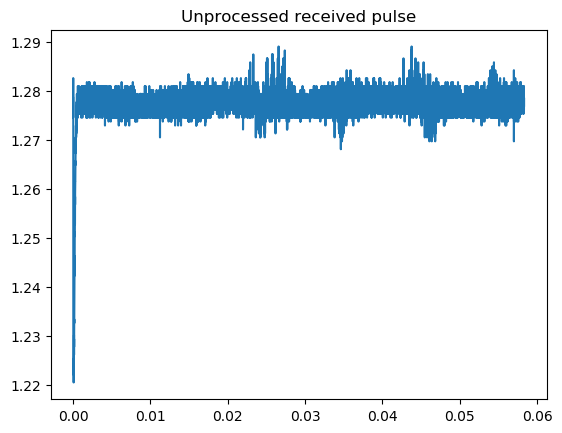

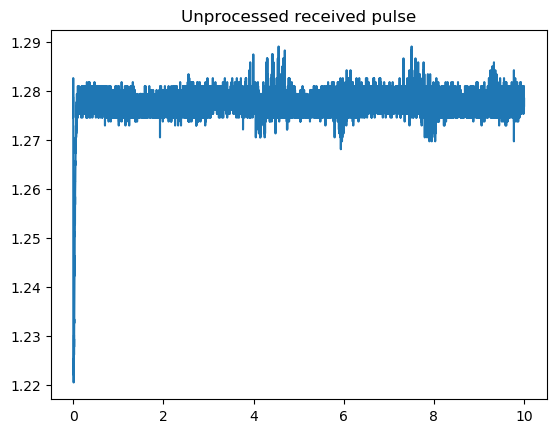

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000000E62F98>

In [26]:
v_rx = receive[1:length(t)]


figure() # Create a new figure
title("Unprocessed received pulse")
plot(t,v_rx) # Basic plot, axis labeled in samples

figure() # Create a new figure
title("Unprocessed received pulse")
plot(r,v_rx) # Basic plot, axis labeled in samples

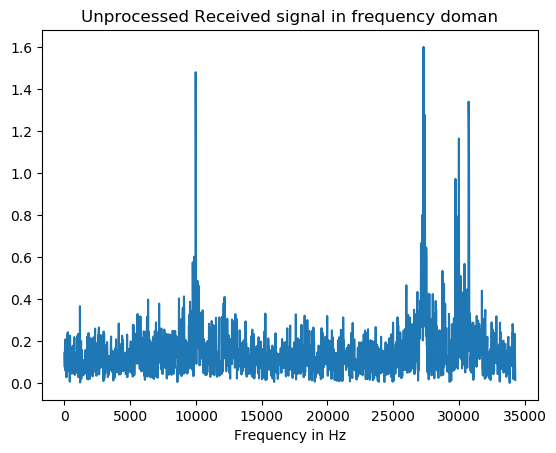

In [27]:
V_RX = (fft(v_rx));

figure("Unprocessed Received signal in frequency doman")
plot(f_axis[1:2000],abs.(fftshift(V_RX))[1:2000] )
title("Unprocessed Received signal in frequency doman")
xlabel("Frequency in Hz");

## Matched Signal

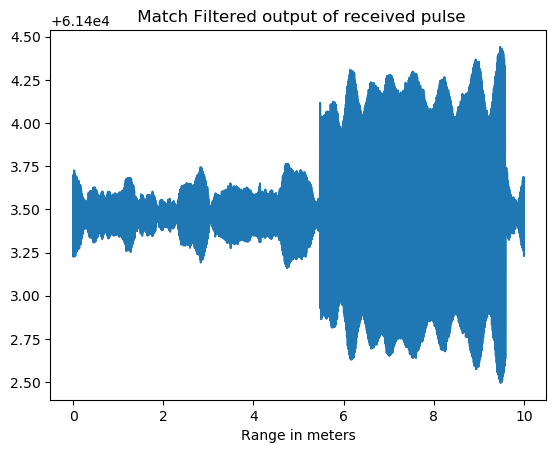

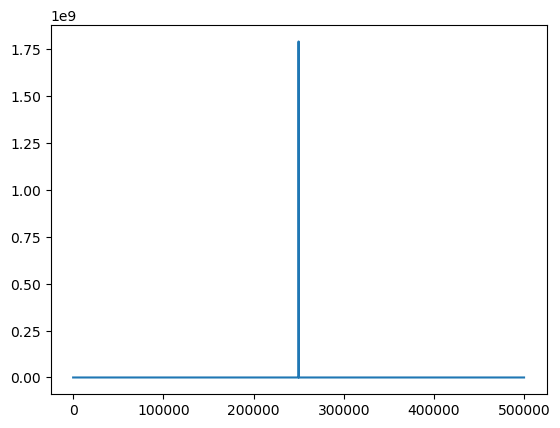

C:\Users\Niceta Nduku\.julia\conda\3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000000114E080>

In [28]:
H = conj( V_TX);

V_MF = H.*V_RX;
v_mf = ifft(V_MF);

figure() # Create a new figure
xlabel("Range in meters")
title(" Match Filtered output of received pulse")
plot(r, v_mf) # Basic plot, axis labeled in samples

figure()
plot(f_axis,abs.(fftshift(V_MF)) )

In [29]:
V_ANAL = 2*V_MF; # make a copy and double the values
N = length(V_MF);

V_ANAL = 2*V_MF; # make a copy and double the values

N = length(V_MF);

if mod(N,2)==0 # case N even
    neg_freq_range = Int(N/2):N; # Define range of “neg-freq” components
else # case N odd
    neg_freq_range = Int((N+1)/2):N;
end

V_ANAL[neg_freq_range] .= 0; # Zero out neg components in 2nd half of array.
v_anal = ifft(V_ANAL);

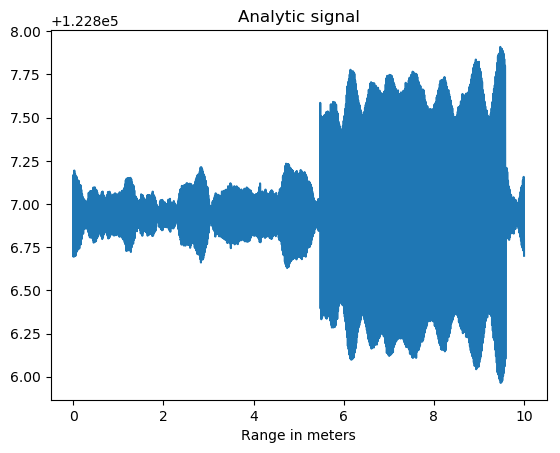

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000000F93320>

In [30]:
figure()
title("Analytic signal")
xlabel("Range in meters")
plot(r,abs.(v_anal))

In [31]:
j=im; # Assign j as sqrt(-1) (“im” in julia)
v_bb = v_anal.*exp.(-j*2*pi*f0.*t);

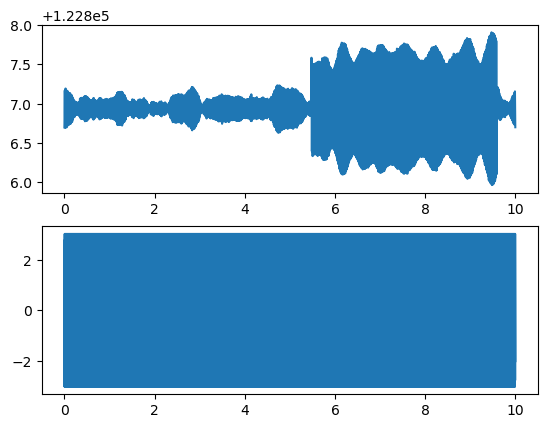

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000024EFA20>

In [32]:
figure()
subplot(2,1,1)
plot(r,abs.(v_bb))
subplot(2,1,2)
plot(r,angle.(v_bb)) #query

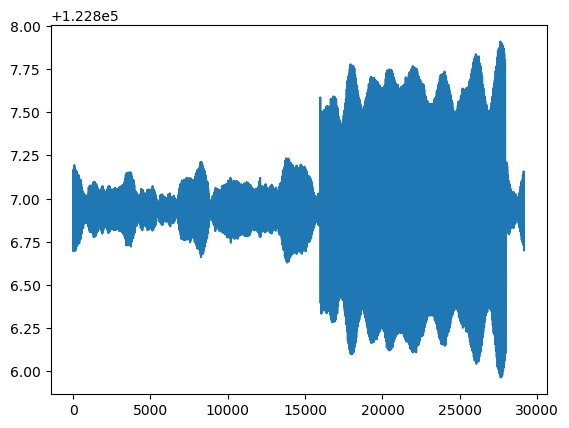

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001E1CF98>

In [33]:
V_BB = fft(v_bb); 
figure()
plot(abs.(v_bb))